In [303]:
from IPython.display import HTML
from vevestaX import vevesta as v
from IPython.display import display, HTML
from PIL import Image
from dask.distributed import Client
from dask.distributed import as_completed
from datetime import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.dates import DateFormatter
from pandas.io.formats.style import Styler
from pivottablejs import pivot_ui
from pmdarima.arima import auto_arima
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import re
from statsmodels.stats.outliers_influence import summary_table
import datetime as dt
import matplotlib
import matplotlib as mp
import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_market_calendars as mcal
import pickle
import rpy2
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import warnings
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import statsmodels
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr
import rpy2
import rpy2.robjects as ro
import time
from clustergram import Clustergram
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.vq import vq
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from k_means_constrained import KMeansConstrained
from scipy.stats import f as f_
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML as html_print
from IPython.display import display

# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
 
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200

import pandas as pd
from rpy2.robjects import pandas2ri
from prophet import Prophet
from multi_prophet.multi_prophet import MultiProphet

from statsmodels.tsa.statespace.varmax import VARMAX

In [304]:

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [305]:
def convert_dates(ds):
    date = pd.to_datetime(ds)
    return(date)

In [306]:
def format_vertical_headers(df):
    """Display a dataframe with vertical column headers"""
    styles = [dict(selector="th", props=[('width', '40px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'), 
                          ('height', '290px'),
                          ('vertical-align', 'top')])]
    return (df.fillna('').style.set_table_styles(styles))

In [307]:
#if not sys.warnoptions:
#    import warnings
#    warnings.simplefilter("ignore")

wd = os.getcwd()

if (os.defpath==".;C:\\bin"):
    os.environ['R_HOME'] = 'C:/Users/User/Documents/R/R-4.1.2'
    os.environ['R_LIBS'] = 'C:/Users/User/Documents/R/R-4.1.2/library'
    from OLS_LR_DiagnosticPlots.ModelDiagnostics import Plot
else:
    os.environ['R_HOME'] = '/mnt/distvol/R/4.0.5/lib64/R/'

pandas2ri.activate()


In [308]:

#robjects.ro['version']

base = importr('base')
#grdevices = importr('grDevices')
print(base._libPaths())

timetk = importr('timetk')
magrittr = importr('magrittr')
dplyr = importr('dplyr')
tidyverse = importr('tidyverse')
nbclust = importr('NbClust')
grdevices = importr('grDevices')


[1] "C:/Users/User/Documents/R/R-4.1.2/library"



In [309]:
si = ['03-31','06-30','09-30','12-31']

#future_commodities_n_w_index_pvt_w_Fred = pd.read_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_future_commodities_n_w_index_pvt_w_Fred.csv')
#[start,end,prices_df, sp1500_index_df, sp500, sp600, sp400, market_data, completed_fred_pvt, completed_bonds, completed_bonds_pvt, sectors, indexes, screener_sorted, dict_sectors, dict_indexes, dict_sectors_reverse, invert_dict_indexes, list_sector_n_indexes, list_stocks] = pickle.load(open('..\\data\\interim\\data_object.pkl', 'rb'))
[start,end,prices_df, sp1500_index_df, sp500, sp600, sp400, market_data, completed_fred_pvt, completed_bonds, completed_bonds_pvt, sectors, indexes, screener_sorted, dict_sectors, dict_indexes, dict_sectors_reverse, invert_dict_indexes, list_sector_n_indexes, list_stocks,future_commodities_n_w_index_pvt_w_Fred] = pickle.load(open('..\\data\\interim\\data_object.pkl', 'rb'))

fred_friendly_names = ['Consumer Loans','Copper','Iron and Steel','Gold','Unemployment','Market volatility','Commercial-Industrial Loans','Average Weekly Hours','Credit to Income','Consumer Confidence','Oil Prices','Inflation','Housing Prices','Interest Rates','10 Year to 3 Month','Recession Indicator','OECD Leading Indicator','Coincident Index','Index: Industrial Production','Mfr Orders Excl AC','Personal Expenditures',]
fred_names = ['CONSUMER','WPUSI019011','WPU101','GVZCLS','UNRATE','VIXCLS','BUSLOANS','AWHAETP','UMCSENT','TDSP','DCOILWTICO','CPIAUCSL','CSUSHPINSA','FEDFUNDS','T10Y3M','USREC','USALOLITONOSTSAM','USPHCI','INDPRO','NEWORDER','PCE']

dict_fred = dict(zip(*[fred_names,fred_friendly_names]))

nyse = mcal.get_calendar('NYSE')
nyse_dates = nyse.schedule(start_date=start, end_date=end)

fundamentals_quarterlies = pickle.load(open('..\\data\\interim\\fundamental.pkl', 'rb'))
fundamental_entries = [e[0] for e in fundamentals_quarterlies]

sectors.columns = ['Symbol']
indexes.columns = ['Symbol']

newDates = pd.date_range((end+ dt.timedelta(7)).strftime('%Y-%m-%d'), (end + dt.timedelta(92)).strftime('%Y-%m-%d'), freq='W-'+nyse_dates.index[-1].strftime('%a')).map(lambda t: t.strftime('%Y-%m-%d'))


In [310]:

temp_df = prices_df[['Open','High','Low','Close','Adj Close','Volume','Symbol']]

In [311]:
#completed_fred_pvt_df = completed_fred_pvt.asfreq('D').reindex(nyse_dates.index).interpolate(method='time')
completed_fred_pvt_df = completed_fred_pvt

temp_new = completed_fred_pvt.asfreq('D').interpolate(method='time',limit_area='inside').reindex(nyse_dates.index)
temp_dates = pd.date_range(completed_fred_pvt.index[0].strftime('%Y-%m-%d'), completed_fred_pvt.index[-1].strftime('%Y-%m-%d'), freq='D').map(lambda t: t.strftime('%Y-%m-%d'))
nyse_inbetween_temp_dates = nyse_dates.index[(nyse_dates.index >= temp_dates[0]) & (nyse_dates.index <= temp_dates[-1])]
temp_new = temp_new.reindex(nyse_inbetween_temp_dates)

completed_fred_pvt_df = temp_new
completed_fred_pvt_df.columns = [name[1] for name in completed_fred_pvt_df.columns]

np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.index)/10))]

array(['2017-03-30', '2017-10-10', '2018-04-24', '2018-11-01',
       '2019-05-17', '2019-11-26', '2020-06-10', '2020-12-18',
       '2021-07-02', '2022-01-12', '2022-07-27'], dtype=object)

In [312]:
n_ahead = 13

cv_inner = TimeSeriesSplit(n_splits=10,test_size=n_ahead)
cv_outer = TimeSeriesSplit(n_splits=11,test_size=n_ahead)


In [313]:

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

def print_color(t):
    print(t)
    display(html_print(' '.join([cstr(ti, color=ci) for ti,ci in t])))


In [314]:
def findknee(xdata):
    rate_of_change=(xdata[0]-xdata[-1])/(len(xdata)-1)
    #print(rate_of_change)
    delta = xdata-xdata[-1]
    deltas = []
    deltas.append(delta[0])
    for d in range(1,len(xdata)):
        deltas.append(deltas[d-1]-rate_of_change)
    #print(deltas)
    for d in range(0,len(xdata)):
        deltas[d]=delta[d]-deltas[d]
    return(np.round(np.abs(deltas)))

def deriveANOVA(clf, df):

    labels = clf.labels_
    clusters = clf.n_clusters
    centers = clf.cluster_centers_
        
    within_ss = []

    for n in range(0,clusters):
      #WSS means the sum of distances between the points and the corresponding centroids for each cluster
      data = df[labels==(n)]
      within_ss.append(((data - centers[n])**2).sum(1).sum())

    WSS = total_within_ss = np.sum(within_ss)

    print('wss',total_within_ss)

    #sum of ((deviation from variable means) squared)
    tot_ss = np.sum(np.sum((df-df.mean())**2))
    print('tot_ss',tot_ss)

    cluster_BSS = []
    for n in range(0,clusters):
      #sum((variable/column means cluster - variable/column means data)^2)*len(cluster members)
      BSS = np.sum((df[labels==(n)].mean()-np.array(np.mean(df)))**2)*len(df[labels==(n)])
      cluster_BSS.append(BSS)

    BSS = np.sum(cluster_BSS)
    print('bss',BSS)
    
    return(tot_ss, BSS, within_ss)

def findOptimalK_ANOVA(df, mink=2, maxk=6, init_min=2, init_max=5):

    tss = []
    bss = []
    wss = []

    for k in range(mink,maxk):
        print(k)

        print(max(init_min,k+1))
        size_min_ = max(init_min,k+1)
        size_max_ = max(np.ceil(len(df)/k),init_max)
        if(size_min_>size_max_):
            break
        else:
            clf = KMeansConstrained(n_clusters=k, size_min=size_min_, size_max=size_max_, init='k-means++', n_init=100, max_iter=100, tol=0.0001, verbose=False, random_state=int(time.time()), copy_x=True, n_jobs=4)
            clf.fit_predict(np.array(df))

            tot_ss, BSS, within_ss = deriveANOVA(clf, df)

            wss.append(within_ss)
            tss.append(tot_ss)
            bss.append(BSS)

    return(tss, bss, wss)

In [315]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total


In [316]:
def highlight_cells(val, color_if_true, color_if_false, threshold_):
    color = color_if_true if val >= threshold_ else color_if_false
    return 'background-color: {}'.format(color)

In [317]:
def derive_fb_test_error(npa):
    n_ahead = 13

    subset_train = npa[0]
    subset_test = npa[1]

    base_model = Prophet()

    prophet_df_base = subset_train['Adj Close'].reset_index()#data.reset_index()
    prophet_df_base.columns = ['ds','y']
    prophet_df_base['y'] = np.log(prophet_df_base['y'])

    base_model.fit(prophet_df_base)

    future_base = base_model.make_future_dataframe(periods = n_ahead,freq='W-'+subset_train.index[-1].strftime('%a'))

    forecast_base = base_model.predict(future_base).set_index('ds')[['yhat','yhat_lower','yhat_upper']]
    df_pred_base = np.exp(forecast_base)

    rmse_ = mean_squared_error(subset_test['Adj Close'].tail(n_ahead), df_pred_base['yhat'].tail(n_ahead), squared=True)
    return([[subset_test['Adj Close'].tail(n_ahead)],[df_pred_base['yhat'].tail(n_ahead)],rmse_])

In [318]:
"""
symbol_ = 'BA'

if(str(symbol_)=='None'):
    run=False
else:
    run=True

if(run):
    client = Client('192.168.3.100:8786')
    #client = Client(n_workers=4,threads_per_worker=1)

    s = symbol_
    msize = 2
    date_form = DateFormatter("%Y-%m-%d")

    metrics_df_ = pd.DataFrame(pd.DataFrame(screener_sorted.loc[s]).T[['volume_factor','Adj Close','adf','hurst']])
    subset=prices_df[prices_df['Symbol']==s]
    
    y = subset['Adj Close']
    data = subset[['Adj Close']].asfreq('D').interpolate().asfreq('W-'+subset.index[-1].strftime('%a'))
"""

'\nsymbol_ = \'BA\'\n\nif(str(symbol_)==\'None\'):\n    run=False\nelse:\n    run=True\n\nif(run):\n    client = Client(\'192.168.3.100:8786\')\n    #client = Client(n_workers=4,threads_per_worker=1)\n\n    s = symbol_\n    msize = 2\n    date_form = DateFormatter("%Y-%m-%d")\n\n    metrics_df_ = pd.DataFrame(pd.DataFrame(screener_sorted.loc[s]).T[[\'volume_factor\',\'Adj Close\',\'adf\',\'hurst\']])\n    subset=prices_df[prices_df[\'Symbol\']==s]\n    \n    y = subset[\'Adj Close\']\n    data = subset[[\'Adj Close\']].asfreq(\'D\').interpolate().asfreq(\'W-\'+subset.index[-1].strftime(\'%a\'))\n'

In [319]:
def plot_(symbols):    

    #symbols = ['ITOS']
    decision_metrics_df = pd.DataFrame()
    
    forecast_winners_df = pd.DataFrame()

    for symbol_ in symbols:

        print(symbol_)
        if(str(symbol_)=='None'):
            run=False
        else:
            run=True

        if(run):
            client = Client('192.168.3.100:8786')
            #client = Client(n_workers=4,threads_per_worker=1)

            s = symbol_
            msize = 2
            date_form = DateFormatter("%Y-%m-%d")

            metrics_df_ = pd.DataFrame(pd.DataFrame(screener_sorted.loc[s]).T)#[['volume_factor','Adj Close','adf','hurst']])
            subset=prices_df[prices_df['Symbol']==s]

            #if less than 2 years of data.
            print(len(subset))
            process = True;
            if(len(subset)<512):
                process=False
            
            if(process):

                dates = []
                for t in subset.index.values:
                    d = pd.Timestamp(t).strftime('%Y-%m-%d')
                    dates.append(d)
                    dto = datetime.strptime(d, '%Y-%m-%d').date()

                old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
                new_ordinal = old_ordinal + md.date2num(np.datetime64('0000-12-31'))
                x = new_ordinal    

                lookup_index_ = []

                labels = list()
                print("symbol:",s)

                symbol_sector = screener_sorted.loc[symbol_]['Sector Symbol']

                print("sector:",dict_sectors_reverse[symbol_sector])
                symbol_index = screener_sorted.loc[s]['Index Symbol']

                try:
                    matched_index_name = indexes.iloc[np.where(indexes['Symbol'].values==s)].index[0]
                except:
                    try:
                        matched_index_name = screener_sorted.loc[s]['Index Symbol']
                    except:
                        matched_index_name = "error"

                print("Index:",dict_indexes[matched_index_name])

                print("Volume Factor:",screener_sorted.iloc[np.where(screener_sorted.index==s)]['volume_factor'][0])

                print("sector_50td_tvf_vel:",screener_sorted[screener_sorted.index==s]['sector_50td_tvf_vel'][0])
                print("risk trend factor:",screener_sorted.iloc[np.where(screener_sorted.index==s)]['50td_tvf_vel'][0])

                temp = pd.DataFrame(market_data.loc[s])
                print(temp[np.array(temp!='error')].replace([np.inf,'inf','error', -np.inf], np.nan).dropna().T)

                last_date = pd.DataFrame(subset.iloc[-1][['50tdBOLD','50tdMA-TP','50tdBOLU']],index=[prices_df[prices_df['Symbol']==s].index[-1].strftime('%Y-%m-%d')]).index[0]

                bbands = pd.DataFrame(subset.iloc[-1][['Adj Close','50tdBOLD','50tdMA-TP','50tdBOLU','200tdSMA','200tdSDev']]).T
                bbands['200td_lower'] = bbands['200tdSMA']-bbands['200tdSDev']*2
                bbands['200td_upper'] = bbands['200tdSMA']+bbands['200tdSDev']*2

                bbands.index = [last_date]
                display(bbands)

                display(metrics_df_)

                mean_revert_flag = False

                if(metrics_df_['adf_50td'][0]<.05):
                    print("ADFuller H0 rejected @ .05, Mean Reverting TS")
                    if(bbands['Adj Close'][0]<bbands['200td_lower'][0]):
                        colored_text = colored(255, 0, 0, "Quarter Mean Reverting buy signal")
                        print(colored_text)
                        mean_revert_flag = True
                    if(bbands['Adj Close'][0]<bbands['50tdBOLU'][0]):
                        colored_text = colored(255, 0, 0, "50 td Mean Reverting buy signal")
                        print(colored_text)
                        mean_revert_flag = True    

                l_axis_legend = pd.DataFrame(['symbol', 'trailing_1yr_max', 'trailing_1yr_min', '30d_vol_2yr','50td_tvf_vel/linear','supply_trend_1yr'],index=['blue','green','red','orange','black','yellow'],columns=['legend'])

                r_axis_legend = pd.DataFrame(['sector','index'],index=['magenta','cyan'],columns=['legend'])

                display_side_by_side([l_axis_legend, r_axis_legend], ['l axis', 'r axis'])        

                f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=False,figsize=(22,5))
                ax1.plot(subset['30d_vol_2yr'],color='orange')
                #plt.title('30d_vol_2yr')
                ax1.set_xticklabels(subset[['30d_vol_2yr']].dropna().index, rotation = 45)

                locator = matplotlib.dates.AutoDateLocator()
                formatter = matplotlib.dates.ConciseDateFormatter(locator)

                ax1.xaxis.set_major_locator(locator)
                ax1.xaxis.set_major_formatter(formatter)

                ax1.xaxis.set_major_formatter(date_form)

                ax2.plot(subset['50td_tvf_vel'],color='black')
                ax2.set_xticklabels(subset[['50td_tvf_vel']].dropna().index, rotation = 45)

                locator = matplotlib.dates.AutoDateLocator()
                formatter = matplotlib.dates.ConciseDateFormatter(locator)

                ax2.xaxis.set_major_locator(locator)
                ax2.xaxis.set_major_formatter(formatter)

                ax2.xaxis.set_major_formatter(date_form)

                ax3_ = ax3.twinx()
                ax5_ = ax5.twinx()        
                ax4_ = ax4.twinx()

                y = subset['Adj Close']

                def myfunc(x):
                    return slope * x + intercept

                slope, intercept, r, p, std_err = stats.linregress(x, y)

                mymodel = list(map(myfunc, x))

                ax3.plot(x, y,marker = '.',markersize=msize, color = 'b')
                ax3.plot(x, subset['trailing_1yr_max'],marker = '.',markersize=msize, color = 'g')
                ax3.plot(x, subset['trailing_1yr_min'],marker = '.',markersize=msize, color = 'r')
                ax3_.plot(x, subset['supply_trend_1yr'],marker = '.',markersize=msize, color = 'y')
                ax3.plot(x, mymodel, color = 'k')

                l = matplotlib.dates.AutoDateLocator()
                f = matplotlib.dates.ConciseDateFormatter(l)    

                ax3.set_xticklabels(ax3.get_xticks(), rotation = 45)

                locator = matplotlib.dates.AutoDateLocator()
                formatter = matplotlib.dates.ConciseDateFormatter(locator)

                ax3.xaxis.set_major_locator(locator)
                ax3.xaxis.set_major_formatter(formatter)
                ax3.xaxis.set_major_formatter(date_form)

                if(symbol_sector=='error'):
                    pass
                else:
                    if(np.sum(sectors['Symbol'].values==s)>0):
                        pass
                    else:
                        sector_subset = prices_df[prices_df['Symbol']==symbol_sector]
                        print("Sector Volume Factor:",screener_sorted.iloc[np.where(screener_sorted.index==symbol_sector)]['volume_factor'][0])
                        print("Sector 50td_tvf_vel:",screener_sorted.iloc[np.where(screener_sorted.index==symbol_sector)]['sector_50td_tvf_vel'][0])
                        #ax3_.plot(x, (sector_subset['Adj Close']).iloc[-len(subset):],marker = '.',markersize=msize,color='m',linestyle=(0, (3, 10, 1, 10)))
                        ax4.plot(x, (sector_subset['Adj Close']).iloc[-len(subset):],marker = '.',markersize=msize,color='m',linestyle=(0, (3, 10, 1, 10)))
                        ax4.plot(x, (sector_subset['trailing_1yr_max']).iloc[-len(subset):],marker = '.',markersize=msize, color = 'g')
                        ax4.plot(x, (sector_subset['trailing_1yr_min']).iloc[-len(subset):],marker = '.',markersize=msize, color = 'r')
                        ax4_.plot(x, (sector_subset['supply_trend_1yr']).iloc[-len(subset):],marker = '.',markersize=msize,color='y',linestyle=(0, (3, 10, 1, 10)))
                        ax4.set_xticklabels(subset.dropna().index, rotation = 45)
                        ax4.xaxis.set_major_formatter(date_form)

                if(str(screener_sorted.loc[s]['Index Symbol'])!='nan'):
                    if(screener_sorted.loc[s]['Index Symbol']!='error'):
                        index_subset = prices_df[prices_df['Symbol']==screener_sorted.loc[s]['Index Symbol']]
                        print("Index Volume Factor:",screener_sorted.iloc[np.where(screener_sorted.index==screener_sorted.loc[s]['Index Symbol'])]['volume_factor'][0])
                        #print("Index 50td_tvf_vel:",screener_sorted.iloc[np.where(screener_sorted.index==screener_sorted.loc[s]['Index Symbol'])]['50td_tvf_vel'][0])
                        ax5.plot(x, index_subset['Adj Close'].iloc[-len(subset):],marker = '.',markersize=msize,color='c',linestyle=(0, (1, 10)))
                        ax5.plot(x, index_subset['trailing_1yr_max'].iloc[-len(subset):],marker = '.',markersize=msize, color = 'g')
                        ax5.plot(x, index_subset['trailing_1yr_min'].iloc[-len(subset):],marker = '.',markersize=msize, color = 'r')
                        ax5_.plot(x, index_subset['supply_trend_1yr'].iloc[-len(subset):],marker = '.',markersize=msize,color='y',linestyle=(0, (1, 10)))
                        ax5.set_xticklabels(index_subset.dropna().index, rotation = 45)
                        ax5.xaxis.set_major_formatter(date_form)

                plt.show()

                data = subset[['Adj Close']].asfreq('D').interpolate().asfreq('W-'+subset.index[-1].strftime('%a'))

                npa_rmse_inner = []

                for trainv_ix, test_ix in cv_inner.split(data.index):

                    npa_rmse_inner.append([data.iloc[trainv_ix],data.iloc[test_ix]])

                npa_rmse_outer = []

                for trainv_ix, test_ix in cv_outer.split(data.index):

                    npa_rmse_outer.append([data.iloc[trainv_ix],data.iloc[test_ix]])        

                print("fbprophet next 13 weeks")

                #starting from next week

                future = client.map(derive_fb_test_error, npa_rmse_inner)        

                rmses_inner = []

                for f in as_completed(future):
                    if(f.status=="error"):
                        rmses_inner.append(np.nan)
                    else:
                        rmses_inner.append(f.result())

                rmses_inner_ = [t[2] for t in rmses_inner]
                rmse_ = [r for r in rmses_inner_]

                rmse_inner_flags = [np.nanmean(rmse_),np.nanstd(rmse_)]

                print("inner cv scores:")
                inner_rmse_df = pd.DataFrame([rmse_inner_flags],columns=['mean','std'])

                scores = inner_rmse_df['mean'].values
                sdevs = inner_rmse_df['std'].values
                print("best inner cv score, sdev (11 folds):",scores[np.argmin(scores)],sdevs[np.argmin(scores)])

                future = client.map(derive_fb_test_error, npa_rmse_outer)
                results_rmses_outer = []

                for f in as_completed(future):
                    if(f.status=="error"):
                        results_rmses_outer.append([np.nan])
                    else:
                        results_rmses_outer.append(f.result()) 

                results_rmses_outer_ = [t[2] for t in results_rmses_outer]
                test_score_mean = np.nanmean([r for r in results_rmses_outer_])
                test_score_std = np.nanstd([r for r in results_rmses_outer_])

                client = Client('192.168.3.100:8786')

                y_s = [t[0] for t in results_rmses_outer]
                y_hats = [t[1] for t in results_rmses_outer]
                test_errors_ = np.array(y_s)-np.array(y_hats)
                np.std(test_errors_,axis=0)
                std_resid = test_errors_/((np.sum(test_errors_)**2)/(len(test_errors_)-2)**.5)

                std_error_test = np.std(test_errors_,axis=0)

                print("test cv mean error, stdev (10 folds):",test_score_mean,test_score_std)

                m = Prophet(interval_width=0.95)

                prophet_df = data['Adj Close'].reset_index()#data.reset_index()
                prophet_df.columns = ['ds','y']
                prophet_df['y'] = np.log(prophet_df['y'])
                m.fit(prophet_df)

                future_ = m.make_future_dataframe(periods = n_ahead,freq='W-'+nyse_dates.index[-1].strftime('%a'))

                forecast = m.predict(future_).set_index('ds')[['yhat','yhat_lower','yhat_upper']]
                df_pred = np.exp(forecast)

                #fb forecast
                temp_df = pd.DataFrame(data['Adj Close']).reset_index()
                temp_df.columns = ['ds','Adj Close']
                temp_df.set_index('ds',inplace=True)

                s_date = df_pred.tail(n_ahead).index[np.argmax(df_pred['yhat'].tail(n_ahead).values)].strftime('%Y-%m-%d')

                print("sell date:",s_date)
                e_return = np.array((np.max(df_pred['yhat'].tail(n_ahead).values)-metrics_df_['Adj Close'])/metrics_df_['Adj Close'])[0]
                p_metrics = pd.DataFrame(df_pred.tail(n_ahead).iloc[np.argmax(df_pred['yhat'].tail(n_ahead).values)]).T
                print("expected return:",e_return)

                days_delta = (datetime.strptime(s_date, '%Y-%m-%d') - datetime.strptime(end.strftime('%Y-%m-%d'), '%Y-%m-%d')).days
                try:
                    discounted_return = (1+e_return)**(1/days_delta)-1
                except:
                    discounted_return = 0
                qtr_return = (1+discounted_return)**92

                print("discounted return:",discounted_return)
                print("quarter return:",qtr_return)

                #95% 2 tail
                t_score = stats.t.ppf(1-0.025, len(test_errors_))

                prediction_interval_yhat_upper = df_pred[['yhat']].tail(n_ahead)+(std_error_test.reshape(n_ahead,1)*t_score)
                prediction_interval_yhat_lower = df_pred[['yhat']].tail(n_ahead)-(std_error_test.reshape(n_ahead,1)*t_score)

                cv_outter_std_ratio = test_score_std / e_return
                cv_outter_err_ratio = test_score_mean / e_return                        

                stop_loss_price = pd.DataFrame(np.mean(pd.concat([df_pred[['yhat']].tail(n_ahead),prediction_interval_yhat_lower],axis=1),axis=1)).iloc[0].values[0]
                decision_metrics_df_ = pd.DataFrame([s,e_return,discounted_return,qtr_return,s_date,stop_loss_price,days_delta,discounted_return,qtr_return,test_score_mean,test_score_std,mean_revert_flag,p_metrics['yhat_upper'].values[0],p_metrics['yhat_lower'].values[0]])#,columns=)#,index=[s_])#.sort_values(by='disc_rtn',ascending=False,inplace=True)
                decision_metrics_df_ = decision_metrics_df_.T
                decision_metrics_df_.columns=['SYMBOL','exp_return','discounted_return','qtr_return','sell_date','stop_loss_price','days_delta','disc_rtn','qtr_rtn','outer_cv_avg_abs_err_n11','outer_cv_std_n11','mean_revert_flag','yhat_upper','yhat_lower']
                decision_metrics_df_.index = [symbol_]       

                bbands_ = bbands[set(bbands.columns).difference(['Adj Close'])]
                bbands_.index = [symbol_]

                outer_cv_avg_abs_err_n11_ratio = pd.DataFrame(test_score_mean/screener_sorted.loc[symbol_]['Adj Close'],columns=['outer_cv_avg_abs_err_n11_ratio'],index=[symbol_])
                outer_cv_std_n11_ratio = pd.DataFrame(test_score_std/screener_sorted.loc[symbol_]['Adj Close'],columns=['outer_cv_std_n11_ratio'],index=[symbol_])


                decision_metrics_df_ = pd.concat([decision_metrics_df_,bbands_,metrics_df_[metrics_df_.columns.difference(['50tdBOLD', '50tdMA-TP', '50tdBOLU','200tdSMA', '200tdSDev'])],outer_cv_avg_abs_err_n11_ratio,outer_cv_std_n11_ratio],axis=1)
                #decision_metrics_df_ = decision_metrics_df_.sort_values(by='exp_return',ascending=True)                        

                print("Outer CV Error / Price Ratio",decision_metrics_df_['outer_cv_avg_abs_err_n11_ratio'])
                print(" Outer CV StdDev / Price Ratio",decision_metrics_df_['outer_cv_std_n11_ratio'])

                decision_metrics_df = pd.concat([decision_metrics_df,decision_metrics_df_],axis=0)            

                savePlot=False
                if(decision_metrics_df_['outer_cv_avg_abs_err_n11_ratio'].values[0]<.9):
                    if(decision_metrics_df_['outer_cv_std_n11_ratio'].values[0]<.9):
                        if(decision_metrics_df_['qtr_return'].values[0]>1.089):
                            forecast_winners_df = pd.concat([forecast_winners_df,decision_metrics_df_],axis=0)
                            savePlot=True                 

                plt.plot(temp_df)
                plt.plot(df_pred)
                plt.legend(['Adj Close','yhat','yhat_lower','yhat_upper'],loc=2)
                plt.xticks(rotation = 45,size=8)

                if(savePlot):
                    plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_'+symbol_+'_full_forecast.png', dpi=300, format='png', bbox_inches='tight')           
                plt.show()

                plt.plot(temp_df.tail(n_ahead))
                plt.plot(df_pred.tail(n_ahead*2))
                plt.plot(prediction_interval_yhat_upper,linestyle = 'dashed')
                plt.plot(prediction_interval_yhat_lower,linestyle = 'dashed')

                plt.legend(['Adj Close','yhat','yhat_lower','yhat_upper','pi_upper','pi_lower'],loc=2)

                plt.xticks(rotation = 45,size=8)

                if(savePlot):
                    plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_'+symbol_+'_13w_forecast.png', dpi=300, format='png', bbox_inches='tight')
                plt.show()

                fcst = m.predict(future_)
                fig = m.plot(fcst)

                if(savePlot):
                    plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_'+symbol_+'_fb_sim_forecast.png', dpi=300, format='png', bbox_inches='tight')
                plt.show()            

                if(np.sum(np.array(fundamental_entries)==s)>0):
                    loc = np.where(np.array(fundamental_entries)==s)[0][0]
                    for item in fundamentals_quarterlies[loc][1]:
                        if(type(item[1]) == type(None)):
                            pass
                        else:
                            if(len(item[1])>0):
                                #print(len(item[1]))
                                #print(item)
                                print(item[0])
                                #with pd.option_context('display.precision', 2):
                                    #display(format_vertical_headers(pd.DataFrame(item[1]).T.sort_index(ascending=True)))
                                display(pd.DataFrame(item[1]).sort_index(ascending=True))
                client.close()

    decision_metrics_df.sort_values(by='exp_return',ascending=False,inplace=True) 
    
    #V.dump(techniqueUsed = end.strftime('%Y-%m-%d')+'_FBProphet', filename = 'fbpropet_metrics.xlsx', message = "FBProphet", version =1)
    decision_metrics_df.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_decision_metrics_df.csv')
    forecast_winners_df.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_forecast_winners_df.csv')

    display(decision_metrics_df)



In [320]:
def colored(r, g, b, text):
    return f"\033[38;2;{r};{g};{b}m{text}\033[0m"

In [321]:
def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

In [322]:
cm = sns.color_palette("blend:red,yellow,green", as_cmap=True)

def b_g(s, cmap=cm, low=0, high=0):
    # Pass the columns from Dataframe A 
    a = A.loc[:,s.name].copy()
    #rng = a.max() - a.min()
    rng = np.nanmax(A.values.ravel()) - np.nanmin(A.values.ravel())
    norm = mp.colors.Normalize(np.nanmin(A.values.ravel()) - (rng * low),
                        np.nanmax(A.values.ravel()) + (rng * high))
    normed = norm(a.values)
    #c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cm)(normed)]
    return ['background-color: %s' % color for color in c]

In [323]:
nyse = mcal.get_calendar('NYSE')
nyse_dates = nyse.schedule(start_date=start, end_date=end)

In [324]:
sector_performance_return = pd.DataFrame()
sector_performance_Q_smoothed_return = pd.DataFrame()

for v in [*indexes['Symbol'],*sectors['Symbol']]:
    subset = prices_df[prices_df['Symbol'] == v]
    #subset_ = subset.set_index('Date').asfreq('Q')[['Adj Close']].pct_change()
    subset_ = subset.asfreq('D').interpolate().asfreq('Q')[['Adj Close']].pct_change()
    #print(subset_)
    #subset_qs = subset.set_index('Date')[['Adj Close']].pct_change().rolling(63).mean()
    subset_qs = subset[['Adj Close']].pct_change().rolling(63).mean()
    subset_.index = subset_.index.values.astype('M8[D]')
    subset_qs.index = subset_qs.index.values.astype('M8[D]')
    dt_str = subset_.index[-1].strftime('%Y-%m-%d')
    #tail = subset[subset.set_index('Date').index>=dt_str]
    tail = subset[subset.index>=dt_str]
    #dt_str = subset.set_index('Date').index[-1].strftime('%Y-%m-%d')
    dt_str = subset.index[-1].strftime('%Y-%m-%d')
    #tail_ = pd.DataFrame([(tail.set_index('Date')['Adj Close'][-1]-tail.set_index('Date')['Adj Close'][0])/tail.set_index('Date')['Adj Close'][0]],index=[datetime.strptime(dt_str, '%Y-%m-%d')],columns=['Adj Close'])
    tail_ = pd.DataFrame([(tail['Adj Close'][-1]-tail['Adj Close'][0])/tail['Adj Close'][0]],index=[datetime.strptime(dt_str, '%Y-%m-%d')],columns=['Adj Close'])
    subset__ = pd.concat([subset_,tail_],axis=0)
    sector_performance_return = pd.concat([sector_performance_return,subset__],axis=1)
    sector_performance_Q_smoothed_return = pd.concat([sector_performance_Q_smoothed_return,subset_qs],axis=1)

In [325]:
sector_performance_Q_smoothed_return.columns = [*[i for i in indexes.index],*[v for v in sectors.index]]
sector_performance_return.columns = [*[i for i in indexes.index],*[v for v in sectors.index]]

In [326]:
"""
from scipy import stats as st
from scipy.stats import t

std_indexes = pd.DataFrame()
seasonal_indexes = pd.DataFrame()

warnings.filterwarnings('ignore')
for spr in sector_performance_return.columns:
    #print(spr)
    s = sector_performance_return[[spr]]
    #print(s)
    years = []
    quarters = []
    for d in sector_performance_return[spr].index:

        d_ = d.strftime('%Y-%m-%d')
        #print(d_)

        datem = dt.datetime.strptime(d_, "%Y-%m-%d")
        years.append(str(datem.year))
        #print(datem.year)       # 2021
        m = datem.month
        d = datem.day
        if(len(str(m))==1):
            m = '0'+str(m)
        else:
            m = str(m)
        if(len(str(d))==1):
            d = '0'+str(d)
        else:
            d = str(d)
        quarters.append(m+"-"+d)

    s['Years'] = years
    s['Quarters'] = quarters
    ct = pd.crosstab(s['Years'], s['Quarters'],values=s[spr],aggfunc=np.mean).mean(axis=0).sort_index()
    ct.columns = [spr]
    
    ct_std = pd.crosstab(s['Years'], s['Quarters'],values=s[spr],aggfunc=np.mean).std(axis=0).sort_index()
    ct_std.columns = [spr]
    
    std_indexes = pd.concat([std_indexes,ct_std],axis=1)
    seasonal_indexes = pd.concat([seasonal_indexes,ct],axis=1)

seasonal_indexes.columns = sector_performance_return.columns

std_indexes.columns = sector_performance_return.columns
    
seasonal_indexes = seasonal_indexes.T

std_indexes = std_indexes.T

si = ['03-31','06-30','09-30','12-31']

print("Seasonal Indexes")

seasonal_index_values_sorted = []
seasonal_index_names_sorted = []
#B = seasonal_indexes[si]
for c in seasonal_indexes[si].columns:
    seasonal_index_values_sorted.append(seasonal_indexes[si][c].sort_values(ascending=False).values)
    seasonal_index_names_sorted.append(seasonal_indexes[si][c].sort_values(ascending=False).index.values)

temp_seasonal_index_values_sorted = pd.DataFrame(seasonal_index_values_sorted).T
temp_seasonal_index_values_sorted.columns = seasonal_indexes[si].columns

temp_seasonal_index_names_sorted = pd.DataFrame(seasonal_index_names_sorted).T
temp_seasonal_index_names_sorted.columns = seasonal_indexes[si].columns

A = temp_seasonal_index_values_sorted
B = temp_seasonal_index_names_sorted 

display(B.style.apply(b_g,cmap=cm))

display(seasonal_indexes[si].style.background_gradient(cmap = cm,axis=0))

print("Note if the final data in the prices ends on a quarter, this will aggregate into the seasonal_index above and there will be no comparison")
print("Current")

display(seasonal_indexes[seasonal_indexes.columns.difference(si)].sort_values(by=seasonal_indexes[seasonal_indexes.columns.difference(si)].columns[0],ascending=False).style.background_gradient(cmap = cm,axis=0))    

#calculate p-value
n=5

print("standard deviations")
display(std_indexes[si])
t_scores = (seasonal_indexes[si])/(std_indexes[si]/np.sqrt(n))
print("t scores")
display(t_scores)
print("p values")
p_values = pd.DataFrame(t.cdf(t_scores, df=n-2),index=seasonal_indexes[si].index,columns=seasonal_indexes[si].columns)

display(p_values.style.applymap(highlight_cells, color_if_true='green', color_if_false='yellow', threshold_=.5))

p_values.hist()
"""

'\nfrom scipy import stats as st\nfrom scipy.stats import t\n\nstd_indexes = pd.DataFrame()\nseasonal_indexes = pd.DataFrame()\n\nwarnings.filterwarnings(\'ignore\')\nfor spr in sector_performance_return.columns:\n    #print(spr)\n    s = sector_performance_return[[spr]]\n    #print(s)\n    years = []\n    quarters = []\n    for d in sector_performance_return[spr].index:\n\n        d_ = d.strftime(\'%Y-%m-%d\')\n        #print(d_)\n\n        datem = dt.datetime.strptime(d_, "%Y-%m-%d")\n        years.append(str(datem.year))\n        #print(datem.year)       # 2021\n        m = datem.month\n        d = datem.day\n        if(len(str(m))==1):\n            m = \'0\'+str(m)\n        else:\n            m = str(m)\n        if(len(str(d))==1):\n            d = \'0\'+str(d)\n        else:\n            d = str(d)\n        quarters.append(m+"-"+d)\n\n    s[\'Years\'] = years\n    s[\'Quarters\'] = quarters\n    ct = pd.crosstab(s[\'Years\'], s[\'Quarters\'],values=s[spr],aggfunc=np.mean).mean(axi

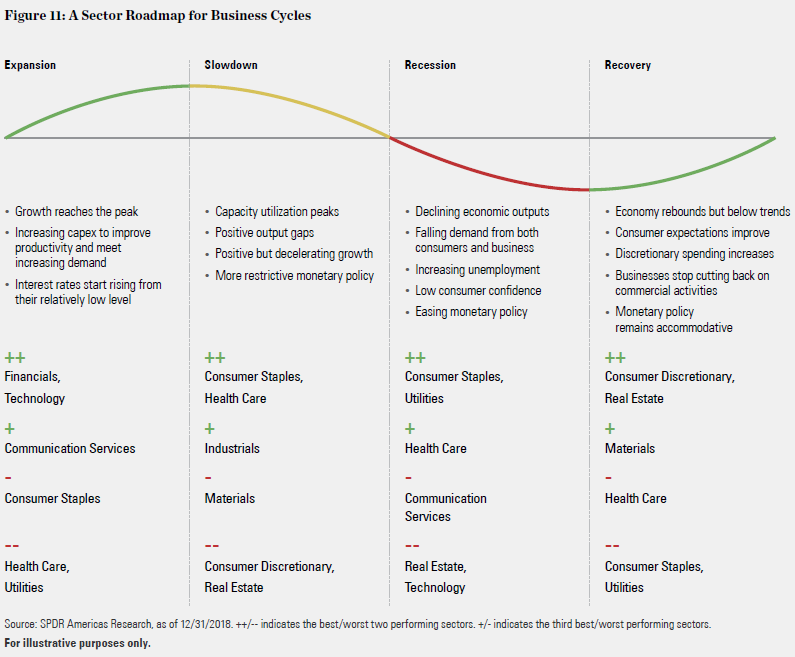

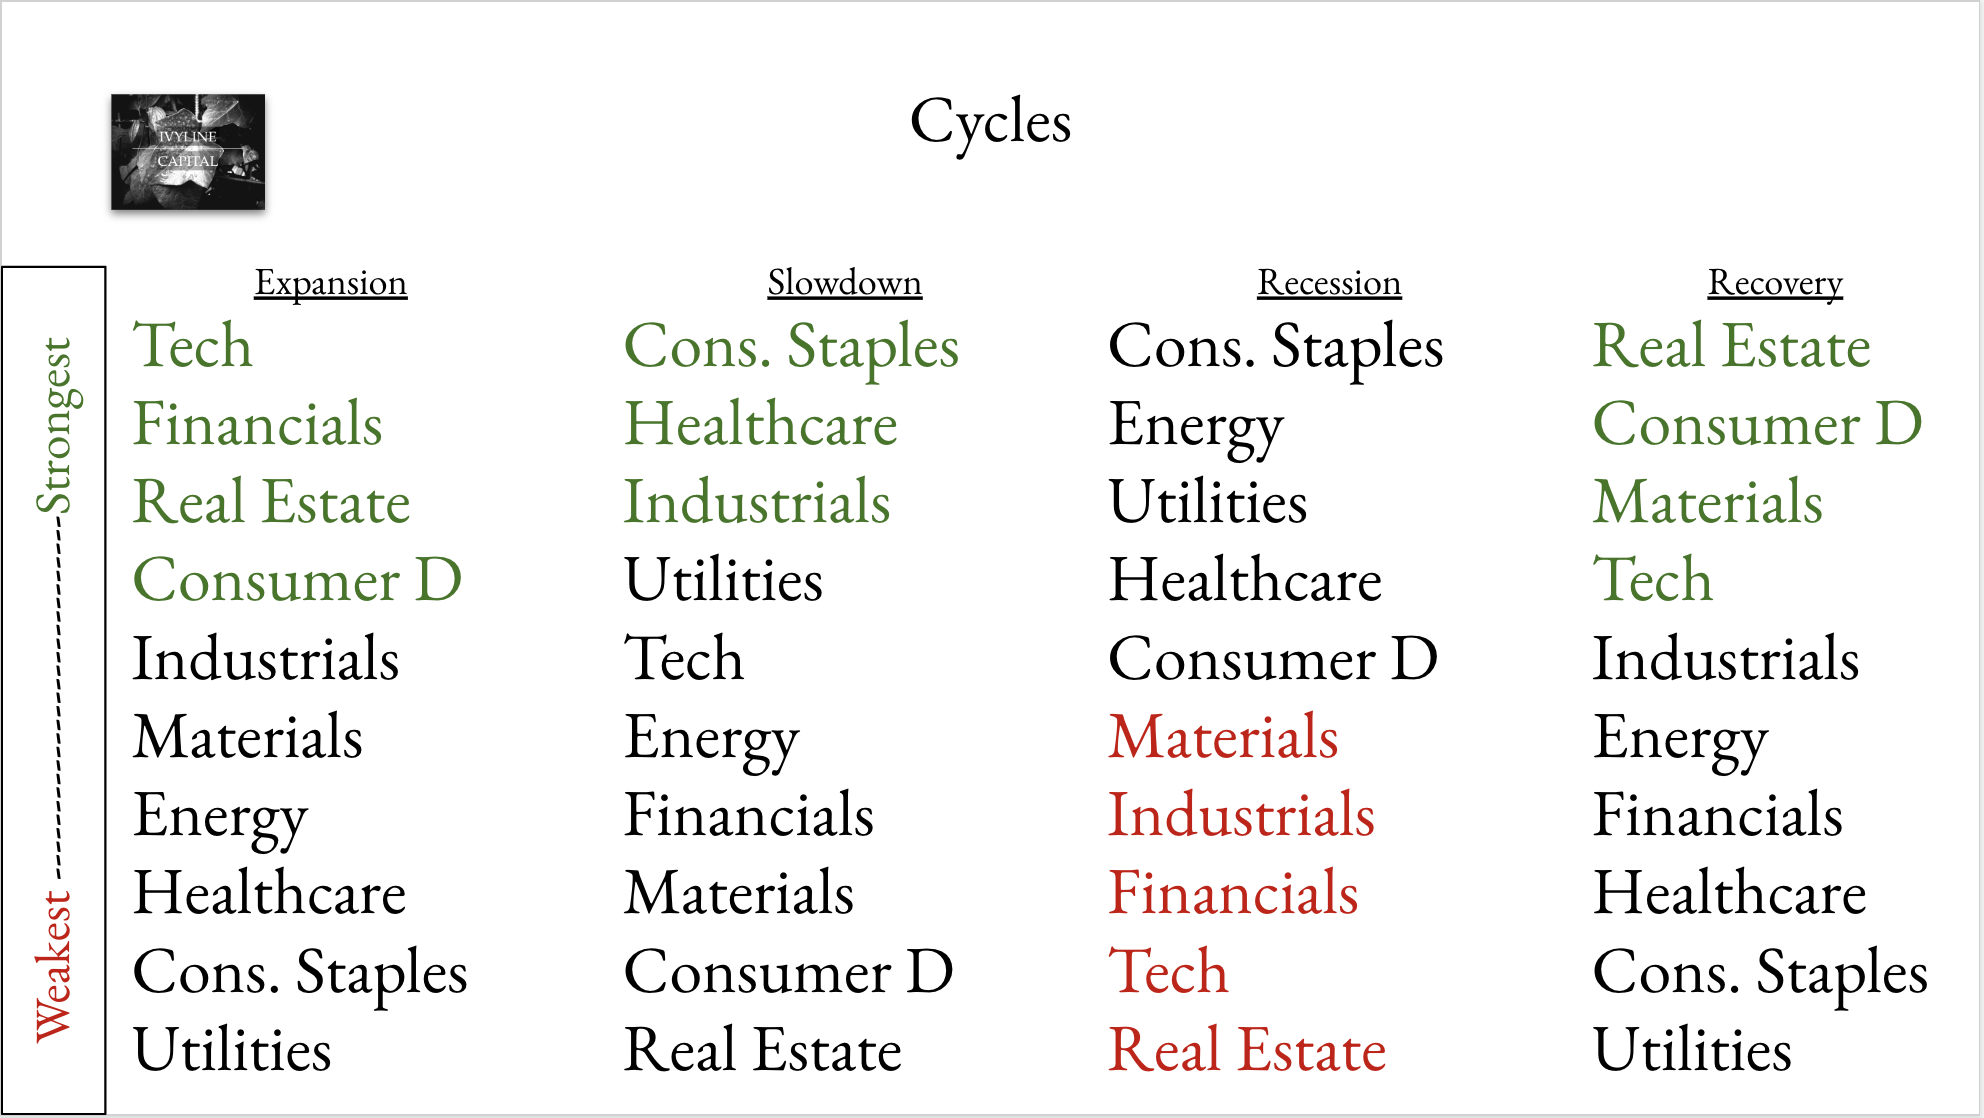

In [327]:
cycles_ = ['Expansion','Slowdown','Recession','Recovery']

path=r"..\data\\interim\\Business cycles.png"
display(Image.open(path))
path=r"..\data\\interim\\Business Cycles-2.png"
display(Image.open(path))

In [328]:
sector_performance_returned_no_dup = sector_performance_return.loc[~sector_performance_return.index.duplicated(keep ='first')]
sector_performance_return_pvt = sector_performance_returned_no_dup[sector_performance_returned_no_dup.iloc[-1].sort_values(ascending=False).index]

sector_performance_return_pvt_heatmap = sector_performance_return_pvt.style.background_gradient(cmap = cm,axis=None)
display(sector_performance_return_pvt_heatmap)

sector_performances = pd.DataFrame()
sector_performances_values = pd.DataFrame()
for c in sector_performance_returned_no_dup.T.columns:
    #print(c)
    temp = pd.DataFrame(sector_performance_returned_no_dup.T[c].sort_values(ascending=False).index,columns=[c])
    #print(temp)
    temp2 = pd.DataFrame(sector_performance_returned_no_dup.T[c].sort_values(ascending=False),columns=[c])
    #print(temp2)
    temp2.reset_index(drop=True,inplace=True)    
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    sector_performances_values = pd.concat([sector_performances_values,temp2],axis=1)
    
A = sector_performances_values
B = sector_performance_returned_no_dup.T

df = B.style.apply(b_g,cmap='RdYlGn')

display(df)


,Consumer Discretionary ETF,Information Technology ETF,SP400,SP600,Industrials ETF,Real Estate ETF,SP1500,SP500,Energy ETF,Financials ETF,Materials ETF,Utilities ETF,Health Care ETF,Consumer Staples ETF,Communication Services ETF
2017-03-31 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-06-30 00:00:00,0.028386,0.041388,0.031752,0.018327,0.042167,0.017375,0.030375,0.030708,-0.078709,0.038955,0.026999,0.022113,0.072895,0.010040,-0.024136
2017-09-30 00:00:00,0.014521,0.083223,0.035020,0.064962,0.052781,0.008095,0.044807,0.045666,0.069612,0.052789,0.066617,0.031518,0.040565,-0.012346,0.015498
2017-12-31 00:00:00,0.097848,0.093087,0.074139,0.038747,0.066175,0.012742,0.066880,0.069917,0.073946,0.073683,0.071798,0.000687,0.018576,0.059268,0.000763
2018-03-31 00:00:00,-0.001942,0.020711,-0.003978,-0.011631,-0.033542,-0.086159,-0.021321,-0.024130,-0.078807,-0.015065,-0.072483,-0.033734,-0.020049,-0.073521,-0.085669
2018-06-30 00:00:00,0.088528,0.080437,0.045520,0.106722,-0.008057,0.094633,0.052094,0.047568,0.150528,-0.011331,0.036210,0.053422,0.055259,0.006353,0.035862
2018-09-30 00:00:00,0.066008,0.117719,0.032902,0.032842,0.094874,0.000044,0.070536,0.078236,0.021911,0.031675,0.007338,0.019751,0.137698,0.050064,0.023115
2018-12-31 00:00:00,-0.162070,-0.174415,-0.172165,-0.193040,-0.183620,-0.058855,-0.142834,-0.137319,-0.267451,-0.138848,-0.154310,0.009925,-0.108129,-0.055862,-0.143117
2019-03-31 00:00:00,0.157197,0.217473,0.157497,0.124660,0.183161,0.173365,0.151853,0.144236,0.178564,0.109942,0.126958,0.103055,0.081835,0.111156,0.139541
2019-06-30 00:00:00,0.040127,0.054745,0.030815,0.010843,0.034436,0.015389,0.039106,0.040369,-0.048754,0.067026,0.040951,0.035855,0.017469,0.036556,0.035928


,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,2022-06-30 00:00:00,2022-07-28 00:00:00
SP1500,nan,0.030375,0.044807,0.066880,-0.021321,0.052094,0.070536,-0.142834,0.151853,0.039106,0.006291,0.090490,-0.205302,0.206715,0.086119,0.132216,0.070761,0.080495,0.000378,0.103038,-0.049102,-0.163728,0.076592
SP500,nan,0.030708,0.045666,0.069917,-0.024130,0.047568,0.078236,-0.137319,0.144236,0.040369,0.011423,0.089876,-0.194477,0.201618,0.090383,0.121185,0.063518,0.083593,0.002523,0.106772,-0.049099,-0.164711,0.076395
SP600,nan,0.018327,0.064962,0.038747,-0.011631,0.106722,0.032842,-0.193040,0.124660,0.010843,-0.004200,0.082573,-0.328050,0.223617,0.032878,0.312278,0.184526,0.043034,-0.030694,0.049293,-0.058344,-0.144536,0.091284
SP400,nan,0.031752,0.035020,0.074139,-0.003978,0.045520,0.032902,-0.172165,0.157497,0.030815,-0.009122,0.066590,-0.247693,0.259149,0.068091,0.211458,0.084662,0.033635,-0.024123,0.077726,-0.089783,-0.178547,0.110236
Communication Services ETF,nan,-0.024136,0.015498,0.000763,-0.085669,0.035862,0.023115,-0.143117,0.139541,0.035928,-0.002023,0.086727,-0.187109,0.224230,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414,-0.216743,0.034882
Consumer Discretionary ETF,nan,0.028386,0.014521,0.097848,-0.001942,0.088528,0.066008,-0.162070,0.157197,0.040127,0.002509,0.056223,-0.231167,0.379795,0.192380,0.172875,0.073815,0.064435,-0.012866,0.099010,-0.103975,-0.254816,0.138222
Consumer Staples ETF,nan,0.010040,-0.012346,0.059268,-0.073521,0.006353,0.050064,-0.055862,0.111156,0.036556,0.056319,0.036517,-0.141472,0.094561,0.098022,0.074374,0.030385,0.029888,-0.018026,0.115277,-0.019862,-0.053953,0.040250
Energy ETF,nan,-0.078709,0.069612,0.073946,-0.078807,0.150528,0.021911,-0.267451,0.178564,-0.048754,-0.075658,0.054552,-0.523877,0.332245,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204,-0.070721,0.059918
Financials ETF,nan,0.038955,0.052789,0.073683,-0.015065,-0.011331,0.031675,-0.138848,0.109942,0.067026,0.013235,0.096390,-0.330709,0.135641,0.028859,0.253698,0.165207,0.074954,0.024323,0.042310,-0.032929,-0.173466,0.059593
Health Care ETF,nan,0.072895,0.040565,0.018576,-0.020049,0.055259,0.137698,-0.108129,0.081835,0.017469,-0.035439,0.147851,-0.131539,0.164463,0.062281,0.101111,0.025327,0.083442,0.000121,0.077925,-0.045192,-0.074220,0.043270


In [329]:
"""
#cm = sns.color_palette("blend:red,yellow,green", as_cmap=True)
#pd.crosstab(shares_viz['Year'], shares_viz['Month'])

#seasonal_indexes[si]
seasonally_adjusted = pd.DataFrame()

for s in sector_performance_return.columns:
    
    s_ = pd.DataFrame(sector_performance_return[s])
    #print(sector_performance_return[s])
    years = []
    quarters = []
    
    for d in s_.index:
        d_ = d.strftime('%Y-%m-%d')
        #print(d_)

        datem = dt.datetime.strptime(d_, "%Y-%m-%d")
        years.append(str(datem.year))
        #print(datem.year)       # 2021
        m = datem.month
        d = datem.day
        if(len(str(m))==1):
            m = '0'+str(m)
        else:
            m = str(m)
        if(len(str(d))==1):
            d = '0'+str(d)
        else:
            d = str(d)
        quarters.append(m+"-"+d)
        
    s_['Quarter'] = quarters
    si_ = seasonal_indexes.loc[s]
    
    modified = pd.DataFrame()
    #print(si_.index)
    for s_i_ in si_.index:
        #print(s_i_)
        #when it finds the last date (which hopefully isn't a quarter date)
        if(np.sum(np.array(si)==s_i_)==0):
            #print("don't modify")
            #print(s_i_)
            match = []
            for entry in si:
                if(int(s_i_.rsplit("-")[0])<=int(entry.rsplit("-")[0])):
                    match = entry
                    break            

            delta_months = int(match.rsplit("-")[0])-int(s_i_.rsplit("-")[0])
            delta_days_ = int(match.rsplit("-")[1])-int(s_i_.rsplit("-")[1])
            
            delta_days = int(delta_months*(91.25/3)+delta_days_)
            #daily interest
            
            #print(delta_days)
            #print(seasonal_indexes.loc[s].loc[match])
            seasonal_index_to_daily = (1+seasonal_indexes.loc[s].loc[match])**(1/91.25)-1
            #print("Seasonal Index to Daily Discounted Interest Rate:",seasonal_index_to_daily)
            daily_extrapolated = (1+seasonal_index_to_daily)**delta_days-1
            #print(daily_extrapolated)
            #print("Daily ^ delta_days:",daily_extrapolated)
            
            #print(match)
            #print(s_i_)
            seasonally_adjusted_column = pd.DataFrame([seasonal_indexes.loc[s].loc[match] - daily_extrapolated],columns=[s],index=[s_.index[-1]])
            
            
        else:
            seasonally_adjusted_column = pd.DataFrame(s_[s][s_['Quarter']==s_i_] - seasonal_indexes.loc[s].loc[s_i_],columns=[s])
        modified = pd.concat([modified,seasonally_adjusted_column],axis=0)
        modified.sort_index(inplace=True)
    #print(modified)
    seasonally_adjusted = pd.concat([seasonally_adjusted,modified],axis=1)

print("Comparative to Seasonal Indexes, tells you who is over or underperforming.")
print("This is Seasonal Index - Extrapolated Current Quarter.")
print("+: seasonal > current")
print("-: current > seasonal")

print("Note if the final data in the prices ends on a quarter, this will aggregate into the seasonal_index above and there will be no comparison")
    
    
std_indexes_seas_adj = pd.DataFrame()
seasonal_indexes_seas_adj = pd.DataFrame()

temp_ = pd.DataFrame(seasonally_adjusted.T.iloc[:,-1])
temp_.columns = pd.DataFrame(seasonally_adjusted.T.iloc[:,-1]).columns.strftime('%Y-%m-%d')
display(temp_.sort_values(by=temp_.columns[0],ascending=False).style.background_gradient(cmap = cm,axis=0))

#display(seasonally_adjusted[seasonally_adjusted.columns.difference(si)].style.background_gradient(cmap = cm,axis=0))

for spr in seasonally_adjusted.columns:
    #print(spr)
    s = seasonally_adjusted[[spr]]
    #print(s)
    years = []
    quarters = []
    for d in seasonally_adjusted[spr].index:
        d_ = d.strftime('%Y-%m-%d')
        #print(d_)

        datem = dt.datetime.strptime(d_, "%Y-%m-%d")
        years.append(str(datem.year))
        #print(datem.year)       # 2021
        m = datem.month
        d = datem.day
        if(len(str(m))==1):
            m = '0'+str(m)
        else:
            m = str(m)
        if(len(str(d))==1):
            d = '0'+str(d)
        else:
            d = str(d)
        quarters.append(m+"-"+d)

    s['Years'] = years
    s['Quarters'] = quarters
    ct = pd.crosstab(s['Years'], s['Quarters'],values=s[spr],aggfunc=np.mean).mean(axis=0).sort_index()
    ct.columns = [spr]
    #print(ct)
    
    ct_std = pd.crosstab(s['Years'], s['Quarters'],values=s[spr],aggfunc=np.mean).std(axis=0).sort_index()
    ct_std.columns = [spr]
    
    std_indexes_seas_adj = pd.concat([std_indexes_seas_adj,ct_std],axis=1)
    seasonal_indexes_seas_adj = pd.concat([seasonal_indexes_seas_adj,ct],axis=1)

seasonal_indexes_seas_adj.columns = seasonally_adjusted.columns

std_indexes_seas_adj.columns = seasonally_adjusted.columns
    
seasonal_indexes_seas_adj = seasonal_indexes_seas_adj.T

std_indexes_seas_adj = std_indexes_seas_adj.T

sector_performances_sea_adj = pd.DataFrame()
sector_performances_values_sea_adj = pd.DataFrame()
for c in seasonally_adjusted.T.columns:
    temp = pd.DataFrame(seasonally_adjusted.T[c].sort_values(ascending=False).index,columns=[c])
    temp2 = pd.DataFrame(seasonally_adjusted.T[c].sort_values(ascending=False),columns=[c])
    temp2.reset_index(drop=True,inplace=True)    
    sector_performances_sea_adj = pd.concat([sector_performances_sea_adj,temp],axis=1)
    sector_performances_values_sea_adj = pd.concat([sector_performances_values_sea_adj,temp2],axis=1)

A = sector_performances_values_sea_adj
B = sector_performances_sea_adj

df_sea_adj = B.style.apply(b_g,cmap='RdYlGn')
display(df_sea_adj)
"""

'\n#cm = sns.color_palette("blend:red,yellow,green", as_cmap=True)\n#pd.crosstab(shares_viz[\'Year\'], shares_viz[\'Month\'])\n\n#seasonal_indexes[si]\nseasonally_adjusted = pd.DataFrame()\n\nfor s in sector_performance_return.columns:\n    \n    s_ = pd.DataFrame(sector_performance_return[s])\n    #print(sector_performance_return[s])\n    years = []\n    quarters = []\n    \n    for d in s_.index:\n        d_ = d.strftime(\'%Y-%m-%d\')\n        #print(d_)\n\n        datem = dt.datetime.strptime(d_, "%Y-%m-%d")\n        years.append(str(datem.year))\n        #print(datem.year)       # 2021\n        m = datem.month\n        d = datem.day\n        if(len(str(m))==1):\n            m = \'0\'+str(m)\n        else:\n            m = str(m)\n        if(len(str(d))==1):\n            d = \'0\'+str(d)\n        else:\n            d = str(d)\n        quarters.append(m+"-"+d)\n        \n    s_[\'Quarter\'] = quarters\n    si_ = seasonal_indexes.loc[s]\n    \n    modified = pd.DataFrame()\n    #print

In [330]:
"""
index_performance = []
for v in indexes['Symbol'].values:
    index_performance.append([v,screener.loc[v]['risk_trend_factor']])
temp_i = pd.DataFrame(index_performance,index=indexes.index)
temp_i.columns = ['Symbol','risk_trend_factor']
index_risk_sorted = pd.DataFrame(index_performance,columns=['Symbol','risk_trend_factor'],index=indexes.index).sort_values(by='risk_trend_factor',ascending=False).reset_index()
index_risk_sorted.columns = ['Index','Symbol','risk_trend_factor']
index_risk_sorted
"""

"\nindex_performance = []\nfor v in indexes['Symbol'].values:\n    index_performance.append([v,screener.loc[v]['risk_trend_factor']])\ntemp_i = pd.DataFrame(index_performance,index=indexes.index)\ntemp_i.columns = ['Symbol','risk_trend_factor']\nindex_risk_sorted = pd.DataFrame(index_performance,columns=['Symbol','risk_trend_factor'],index=indexes.index).sort_values(by='risk_trend_factor',ascending=False).reset_index()\nindex_risk_sorted.columns = ['Index','Symbol','risk_trend_factor']\nindex_risk_sorted\n"

In [331]:
"""
sector_performance = []
for v in sectors['Symbol'].values:
    sector_performance.append([v,screener.loc[v]['risk_trend_factor']])
temp_v = sectors.reset_index()
temp_v.columns = ['Sector','Symbol']
sectors_risk_sorted = pd.DataFrame(sector_performance,columns=['Symbol','risk_trend_factor']).merge(temp_v, on='Symbol', how='left').sort_values(by='risk_trend_factor',ascending=False)    
sectors_risk_sorted
"""

"\nsector_performance = []\nfor v in sectors['Symbol'].values:\n    sector_performance.append([v,screener.loc[v]['risk_trend_factor']])\ntemp_v = sectors.reset_index()\ntemp_v.columns = ['Sector','Symbol']\nsectors_risk_sorted = pd.DataFrame(sector_performance,columns=['Symbol','risk_trend_factor']).merge(temp_v, on='Symbol', how='left').sort_values(by='risk_trend_factor',ascending=False)    \nsectors_risk_sorted\n"

Rolling Quarterly Mean Return


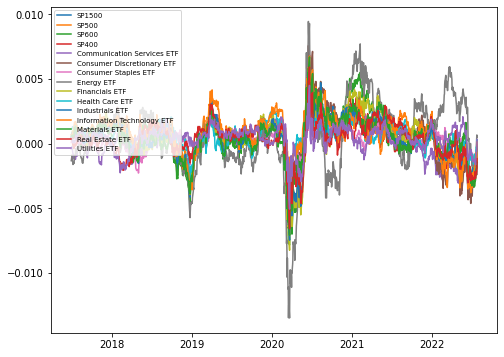

In [332]:
print("Rolling Quarterly Mean Return")
plt.plot(sector_performance_Q_smoothed_return)
plt.legend([*[i for i in indexes.index],*[v for v in sectors.index]],loc=2,fontsize=7)
plt.show()

Quarterly Returns


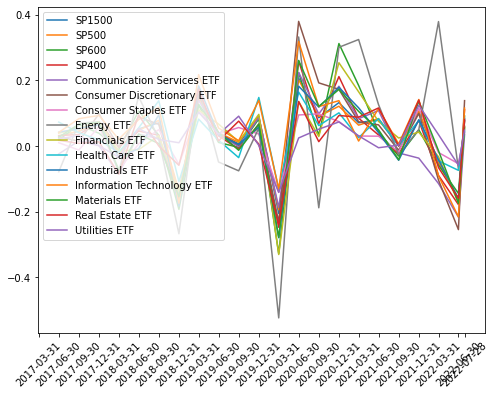

In [333]:
print ("Quarterly Returns")
for v in sector_performance_return.T.index:
    subset = pd.DataFrame(sector_performance_return.T.loc[v])
    subset.columns = ['Return']
    plt.plot(subset)
    plt.xticks(subset.index, rotation=45)
plt.legend(sector_performance_return.T.index,loc=2)    
plt.show()


In [334]:
"""
plt.plot(seasonal_indexes[si].T)
plt.legend(seasonal_indexes[si].T.columns,loc=2,fontsize=8)
plt.show()
"""

'\nplt.plot(seasonal_indexes[si].T)\nplt.legend(seasonal_indexes[si].T.columns,loc=2,fontsize=8)\nplt.show()\n'

In [335]:
#risk_trend_threshold

In [336]:
#market_data['sector'] = stock_fundamentals['sector']

In [337]:
#screener[['risk_trend_factor']].replace(['missing','error'], np.NaN).dropna().hist()

In [338]:
#len(screener)

In [339]:
#prices_df.columns

In [340]:
#threshold

In [341]:
#threshold_value = summary.dropna()['risk_trend_factor'].quantile([threshold])

In [342]:
threshold = 1

In [343]:
screener_sorted.columns

Index(['Date', 'buy_volume_pct', 'sell_volume_pct', 'daily_buy_vol',
       'daily_sell_vol', 'net_daily_vol', '20td_trend_vol',
       '20td_tot_daily_vol', '20td_trend_vol_factor', '20td_tvf_rng_div_2',
       '20td_tvf_vel', '50td_trend_vol', '50td_tot_daily_vol',
       '50td_trend_vol_factor', '50td_tvf_rng_div_4', '50td_tvf_vel',
       'MIN_Lookback_One_Year', 'MIN_Lookback_2_Months',
       'MIN_Lookback_1_Months', 'risk_trend_factor', 'risk_per_share',
       'volume_factor', 'Adj Close', '50tdBOLD', '50tdMA-TP', '50tdBOLU',
       '200tdSMA', '200tdSDev', 'adf_50td', 'tau_50td', 'tau_50td_p',
       'hurst_50td', 'sector_50td_tvf_vel', 'sector_20td_tvf_vel',
       'sector_risk_trend_factor', 'Sector', 'Sector Symbol', 'Market Index',
       'Index Symbol', 'shortName', 'beta', 'currentRatio', 'debtToEquity',
       'dividendRate', 'dividendYield', 'earningsGrowth',
       'earningsQuarterlyGrowth', 'ebitda', 'ebitdaMargins', 'exDividendDate',
       'forwardEPS', 'forwardPE'

In [344]:
fred_pvt_sample = completed_fred_pvt_df[fred_names].asfreq('D').interpolate(method='time').asfreq('Q').dropna()

In [345]:
tvv_50td_filter = screener_sorted['50td_tvf_vel'].replace(['missing','missingmissing','error'], np.nan).dropna()
tvv_50td_filter = tvv_50td_filter[tvv_50td_filter>np.max([tvv_50td_filter.median(),tvv_50td_filter.mean()])]

tvv_20td_filter = screener_sorted['20td_tvf_vel'].replace(['missing','missingmissing','error'], np.nan).dropna()
tvv_20td_filter = tvv_50td_filter[tvv_20td_filter>np.max([tvv_20td_filter.median(),tvv_20td_filter.mean()])]

risk_trend_factor_filter = screener_sorted['risk_trend_factor'].replace(['missing','missingmissing','error'], np.nan).dropna()
risk_trend_factor_filter = risk_trend_factor_filter[risk_trend_factor_filter>np.max([risk_trend_factor_filter.median(),risk_trend_factor_filter.mean()])]

filtered = np.unique([*tvv_50td_filter.index,*tvv_20td_filter.index, *risk_trend_factor_filter.index])

filtered = set(risk_trend_factor_filter.index).intersection(set(tvv_50td_filter.index).intersection(tvv_20td_filter.index))

filtered = screener_sorted.loc[filtered][['50td_tvf_vel','20td_tvf_vel','risk_trend_factor']]
filtered = (filtered>filtered.median()).all(axis=1)
filtered = filtered[filtered].index

#filtered = screener_sorted.loc[filtered][['50td_tvf_vel','20td_tvf_vel','risk_trend_factor']]
#filtered = filtered[filtered>np.max([filtered.median()])]
print(len(filtered))

109


In [346]:
filtered_screener_sorted = screener_sorted.loc[filtered]

In [347]:
len(filtered_screener_sorted)

109

In [348]:

with localconverter(ro.default_converter + pandas2ri.converter):
      r_from_pd_df = ro.conversion.py2rpy(fred_pvt_sample.melt(ignore_index=False).reset_index().rename(columns={'index': 'Date'}))


In [349]:
#ro.X11()
#ro.windows()
ro.r('''

my_mean <- function(x, na.rm=TRUE) {
  mean(x, na.rm = na.rm)
}

f <- function(y) {
#print(y)

#library(arfima)
#varvefd = arfima(y)
#d = summary(varvefd)$coef[[1]][1]
#return(d)

tsfeature_tbl <- y %>%
group_by(variable) %>%
tk_tsfeatures(
  .date_var = Date,
  .value    = value,
  .period   = 4,
  .features = c("frequency", "stl_features", "entropy", "acf_features", "my_mean"),
  .scale    = TRUE,
  .prefix   = "ts_"
) %>%
ungroup()
    
print(tsfeature_tbl)

set.seed(123)

cluster_tbl <- tibble(
    cluster = tsfeature_tbl %>% 
        select(-variable) %>%
        as.matrix() %>%
        kmeans(centers = 7, nstart = 100) %>%
        pluck("cluster")
) %>%
    bind_cols(
        tsfeature_tbl
    )

cluster_tbl

cluster_tbl %>%
    select(cluster, variable) %>%
    right_join(y, by = "variable") %>%
    group_by(variable) %>%
    plot_time_series(
      Date, value, 
      .color_var   = cluster, 
      .facet_ncol  = 2, 
      .interactive = FALSE
    )
plot(cluster_tbl)

return(tsfeature_tbl)
}
''')
grdevices.png(file="..\\reports\\figures\\cluster_tbl.png", width=4096, height=1024)
r_f = ro.globalenv['f']

d=ro.conversion.rpy2py((r_f(ro.conversion.py2rpy(r_from_pd_df))))

#rprint(pp)

time.sleep(3)
#grdevices.dev_copy(device = r.png, filename = "plot.png", width = 1000, height = 500)
grdevices.dev_off()

#From here optional, if you want a waiting time
#Elsewise close the plot manually afterwards with grdevices.dev_off()

#grdevices.dev_off()
#grdevices.dev_off()


# A tibble: 21 x 22
   variable    ts_frequency ts_nperiods ts_seasonal_period ts_trend    ts_spike
   <chr>              <dbl>       <dbl>              <dbl>    <dbl>       <dbl>
 1 CONSUMER               4           1                  4    0.991 0.000000770
 2 WPUSI019011            4           1                  4    0.971 0.00000614 
 3 WPU101                 4           1                  4    0.986 0.00000100 
 4 GVZCLS                 4           1                  4    0.710 0.000757   
 5 UNRATE                 4           1                  4    0.710 0.00107    
 6 VIXCLS                 4           1                  4    0.536 0.00158    
 7 BUSLOANS               4           1                  4    0.919 0.0000474  
 8 AWHAETP                4           1                  4    0.918 0.0000646  
 9 UMCSENT                4           1                  4    0.903 0.0000639  
10 TDSP                   4           1                  4    0.757 0.000503   
# ... with 11 more r

array([1], dtype=int32)

In [350]:
pca = PCA(n_components=0.99, svd_solver='full')

X = np.array(d.iloc[:,1:])

pca.fit(scale(X))
#pca.explained_variance_
pca.explained_variance_ratio_.cumsum()
X_pca = pd.DataFrame(pca.transform(d.iloc[0:,1:]))
X_pca.index = d.index
X_pca.sort_values(by=[0],ascending=False,inplace=True)

TSS_ = []
BSS_ = []
WSS_ = []
silhouettes_ = []

for k in range(2,int(len(d)/2)):
    model = KMeans(n_clusters=k, random_state=0, n_init=100).fit(X)
    #print(model.inertia_)

    codebook = np.array(model.cluster_centers_)
    partition, euc_distance_to_centroids = vq(X, codebook)
    WSS = np.sum(euc_distance_to_centroids**2)
    
    silhouette_avg = silhouette_score(X, model.labels_)

    silhouettes_.append(silhouette_avg)
    
    TSS = np.sum((X-X.mean(0))**2)

    BSS = TSS - WSS

    TSS_.append(TSS)
    BSS_.append(BSS)
    WSS_.append(WSS)
    
    #print(TSS, WSS, BSS)


C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [351]:

init_min = 2
init_max = 5


mink = 2
maxk = 6

tss, bss, wss = findOptimalK_ANOVA(X_pca, mink = mink, maxk = maxk)

2
3
wss 137.75123698995586
tot_ss 207.99417868881815
bss 70.24294169886237
3
4
wss 106.28906194386684
tot_ss 207.99417868881815
bss 101.70511674495135
4
5
wss 68.56095700982866
tot_ss 207.99417868881815
bss 139.43322167898953
5
6


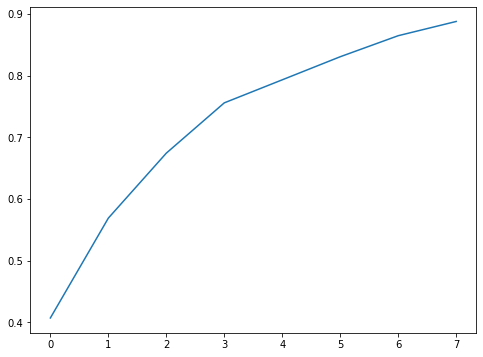

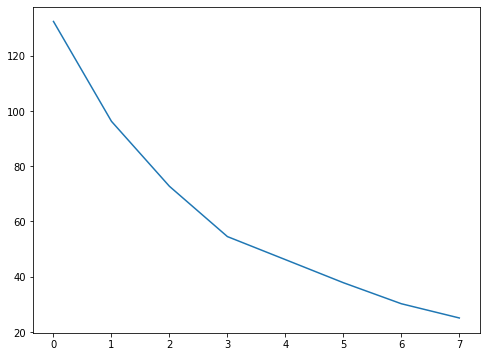

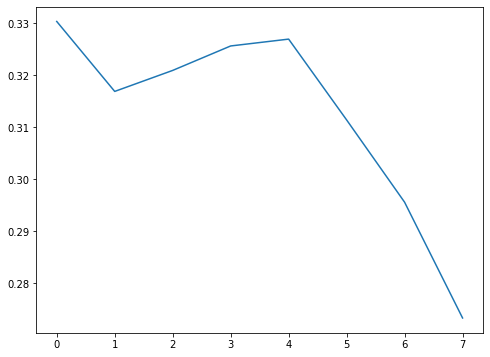

In [352]:
plt.plot(np.array(BSS_)/np.array(TSS_))
plt.show()
plt.plot(np.array(WSS_))
plt.show()
plt.plot(np.array(silhouettes_))
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_21300\1748299227.py:7: RuntimeWarning: invalid value encountered in divide
  temp_df = pd.DataFrame(bss_/wss_).replace([np.inf, -np.inf, np.NaN], 0)


3


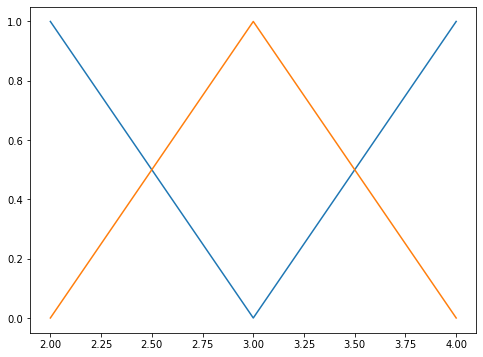

In [353]:

bss_ = findknee(bss)
bss_ = bss_/np.max(bss_)

wss_ = findknee(np.array(pd.DataFrame(wss).mean(1)))
wss_ = wss_/np.max(wss_)

temp_df = pd.DataFrame(bss_/wss_).replace([np.inf, -np.inf, np.NaN], 0)
temp_df.index = np.array(range(0,len(wss_)))+mink
#plt.plot(temp_df)

set_ = np.abs(temp_df-1)
plt.plot(set_)

optimal_k = np.argmin(set_)+mink
plt.plot(abs(set_-1))
 
print(optimal_k)


In [354]:
clf = KMeansConstrained(n_clusters=optimal_k, size_min=init_min, size_max=max(np.ceil(len(X_pca)/optimal_k),init_max), init='k-means++', n_init=100, max_iter=100, tol=0.0001, verbose=False, random_state=None, copy_x=True, n_jobs=4)
clf.fit_predict(X_pca)

labels = clf.labels_
clusters = clf.n_clusters
centers = clf.cluster_centers_

print(labels)

tot_ss, BSS, within_ss = deriveANOVA(clf, X_pca)

Global_F = (BSS/(optimal_k-1))/(np.mean(within_ss)/(len(X_pca)-optimal_k))
global_sig = 1-f_.cdf(Global_F, (len(X_pca)-optimal_k), len(X_pca)-1)

ind_F_scores = []

for w in range(0,len(within_ss)):

    dfn = (optimal_k-1)
    dfd = np.sum(labels==w)-optimal_k

    F_score = (BSS/dfn)/(within_ss[w]/(dfd))
    ind_F_scores.append(F_score)

print("Global F:",Global_F)
print("Global Sig:",global_sig)
print("F-Scores:", ind_F_scores)

print("P-Scores:", 1-f_.cdf(ind_F_scores, dfn, dfd))

X_pca['cluster'] = labels

[2 1 2 2 2 1 2 2 2 0 0 1 0 0 0 1 0 1 1 0 1]
wss 107.56083657924236
tot_ss 207.99417868881815
bss 100.43334210957582
Global F: 25.210851116435673
Global Sig: 5.749889453454671e-10
F-Scores: [7.016296949908876, 6.832810313609495, 4.055056034700308]
P-Scores: [0.04920436 0.05126987 0.10909973]


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.0930018424987793 seconds.
K=3 fitted in 0.10099601745605469 seconds.


C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


K=4 fitted in 0.10000419616699219 seconds.
K=5 fitted in 0.10499811172485352 seconds.


C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


K=6 fitted in 0.10999751091003418 seconds.
K=7 fitted in 0.11985611915588379 seconds.


C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\3.9-JupyterLab\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Clustergram(k_range=range(1, 8), backend='sklearn', method='kmeans', kwargs={})

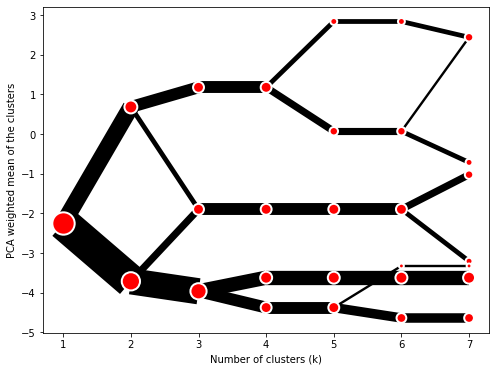

In [355]:


cgram = Clustergram(range(1, 8))
cgram.fit(X_pca)
cgram.plot()
cgram

In [356]:
"""
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)
"""

"\n \n# define input sequence\nraw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]\n# choose a number of time steps\nn_steps = 3\n# split into samples\nX, y = split_sequence(raw_seq, n_steps)\n# reshape from [samples, timesteps] into [samples, timesteps, features]\nn_features = 1\nX = X.reshape((X.shape[0], X.shape[1], n_features))\n# define model\nmodel = Sequential()\nmodel.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))\nmodel.add(Dense(1))\nmodel.compile(optimizer='adam', loss='mse')\n# fit model\nmodel.fit(X, y, epochs=200, verbose=0)\n# demonstrate prediction\nx_input = array([70, 80, 90])\nx_input = x_input.reshape((1, n_steps, n_features))\nyhat = model.predict(x_input, verbose=0)\nprint(yhat)\n"

In [357]:
"""
model = VARMAX(future_commodities_n_w_index_pvt_w_Fred_, order=(1,1,))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(13)
print(yhat)
"""

'\nmodel = VARMAX(future_commodities_n_w_index_pvt_w_Fred_, order=(1,1,))\nmodel_fit = model.fit(disp=False)\nyhat = model_fit.forecast(13)\nprint(yhat)\n'

In [358]:
prices_pvt = pd.pivot_table(prices_df, values=['Adj Close'], index=prices_df.index,columns='Symbol').asfreq('D').interpolate(method='time',limit_direction='forward',limit_area='inside').reindex(nyse_dates.index)
prices_pvt.index = [d.strftime('%Y-%m-%d') for d in prices_pvt.index]
prices_pvt.columns = prices_pvt.columns.droplevel(0)
prices_pvt.index = [pd.to_datetime(d) for d in prices_pvt.index]
combined_prices_w_commodities = prices_pvt.join(future_commodities_n_w_index_pvt_w_Fred.reindex(prices_pvt.index)).dropna()

In [359]:

lengths = []
for i in range(0,max(X_pca['cluster'])+1):
    subset = d.loc[X_pca[X_pca['cluster']==i].index]
    lengths.append(len(subset))
    
colors = ['purple','cyan','magenta','green','red','black','pink','yellow','blue','brown','orange','grey']
my_cmap = LinearSegmentedColormap.from_list(
    'color_map', colors, N=max(lengths))

rescale = lambda y: (y - 0) / (np.max(lengths) - 0)    


Group:  0


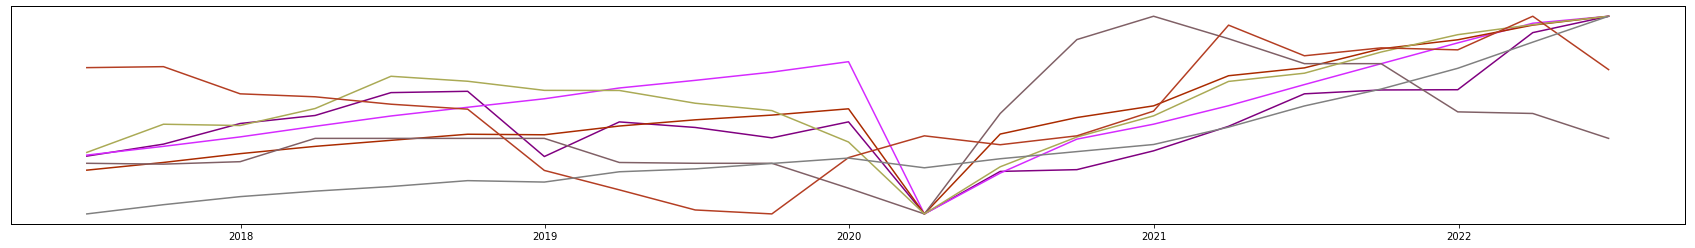

Group:  1


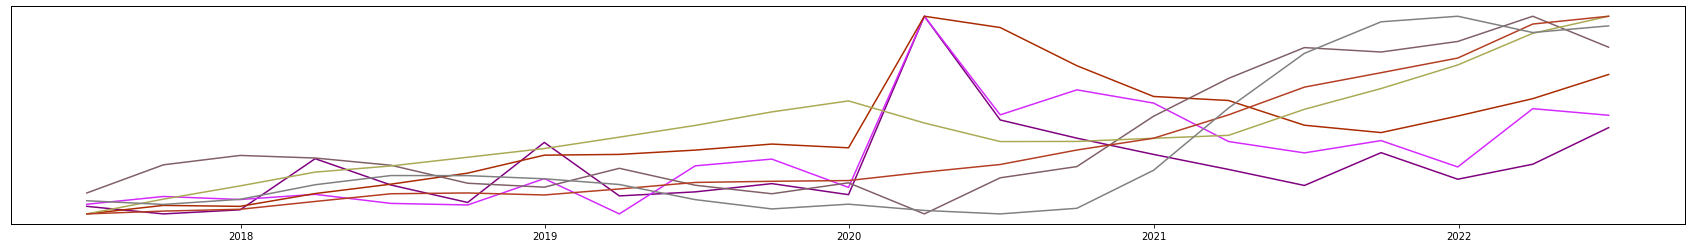

Group:  2


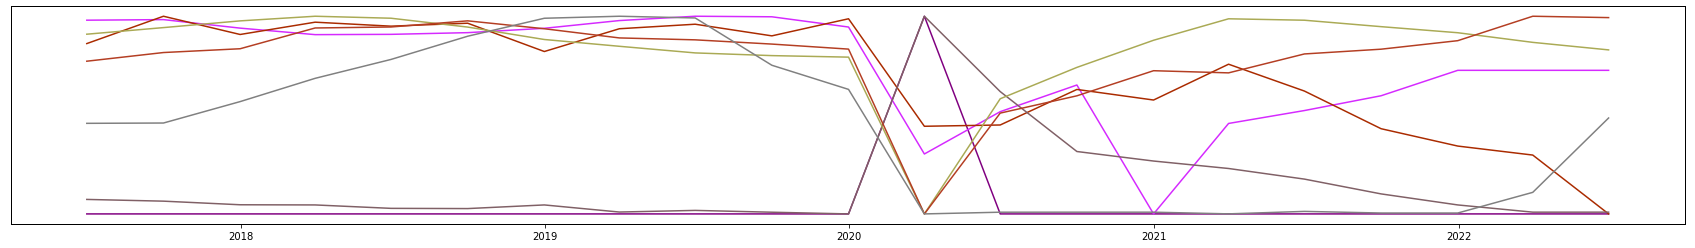

In [360]:

for i in range(0,max(X_pca['cluster'])+1):
    print("Group: ",i)
    subset = d.loc[X_pca[X_pca['cluster']==i].index]
    #
    for c_ in range(0,len(subset['variable'])):
        c = subset['variable'].values[c_]
        try:
            #print(dict_fred[c])
            display(html_print(' '.join([cstr(ti, color=ci) for ti,ci in ((dict_fred[c], colors[c_]),)])))

            #display(html_print(' '.join([cstr(ti, color=my_cmap(rescale(c_))) for ti in (('hello my name is'),)])))
            #print(colored("hello red world", my_cmap(rescale(c_))))
            if(c_==0):
                fig, ax1 = plt.subplots( figsize=(30,4))
                ax1.plot(fred_pvt_sample[c],color=my_cmap(rescale(c_)))
                ax1.get_yaxis().set_ticks([])
            else: 
                ax2 = ax1.twinx()
                ax2.plot(fred_pvt_sample[c],color=my_cmap(rescale(c_)))
                ax2.get_yaxis().set_ticks([])
        #ax1.legend(subset['variable'].values,loc=2)
        except:
            pass
    plt.show()

In [361]:
filter_ = fred_pvt_sample.columns.tolist()
def f3(Y):
    
    #Y = x
    #output_slider_variable.value
    internalFilter = filter_.copy()
    internalFilter.remove(Y)
    all_data_ = pd.concat([fred_pvt_sample[Y],fred_pvt_sample[internalFilter]], axis=1)    
    #print(all_data_.describe())
    display(fred_pvt_sample.describe())
    #x_ticks = all_data_.index[np.arange(0, len(all_data.index), int(len(internalFilter)/5))]
    x_ticks  = []
    for index, element in enumerate(fred_pvt_sample.index):
        if index % int(np.round(len(fred_pvt_sample.index)/10)) == 0:
            x_ticks.append(element)
    plt.plot(fred_pvt_sample[Y])
    plt.xticks(x_ticks, rotation = 45)
    plt.show()        
    plt.hist(fred_pvt_sample[Y], bins='auto')
    plt.show()
    diff = pd.DataFrame((fred_pvt_sample[Y].pct_change())).dropna()
    plt.hist(diff, bins='auto')
    plt.show()
    return(fred_pvt_sample)
    
out = interactive(f3, Y=filter_)

#output_slider_variable.observe(f4, 'value')

print("choose Y")
display(out)


choose Y


interactive(children=(Dropdown(description='Y', options=('CONSUMER', 'WPUSI019011', 'WPU101', 'GVZCLS', 'UNRAT…

nominal, pct_change, pct_change().cumsum
Consumer Loans CONSUMER


C:\Users\User\AppData\Local\Temp\ipykernel_21300\1907383185.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.index)/10))], rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_21300\1907383185.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.index)/10))], rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_21300\1907383185.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.in

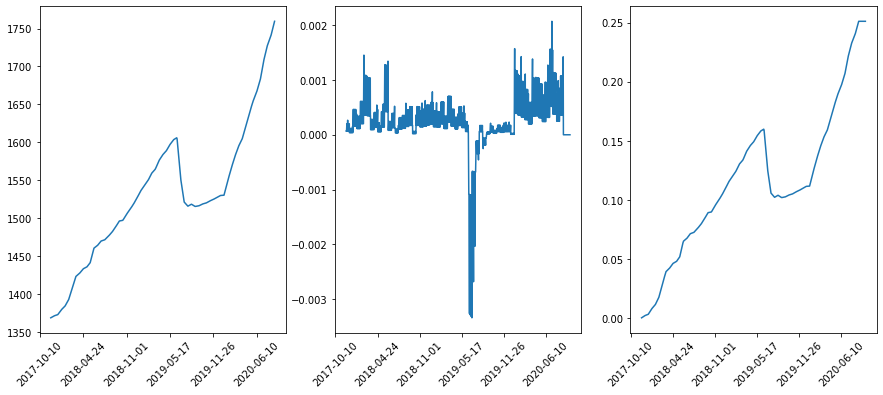

Copper WPUSI019011


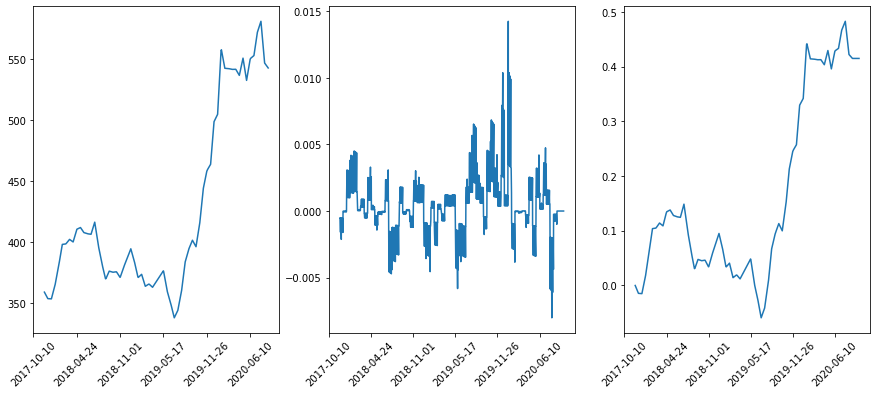

Iron and Steel WPU101


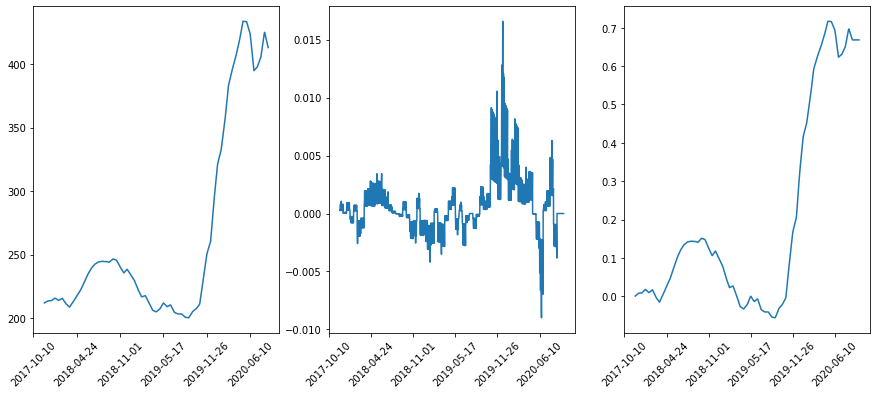

Gold GVZCLS


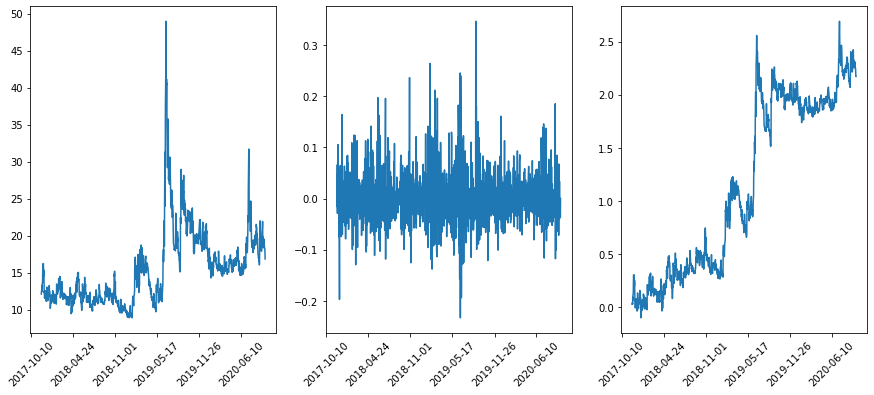

Unemployment UNRATE


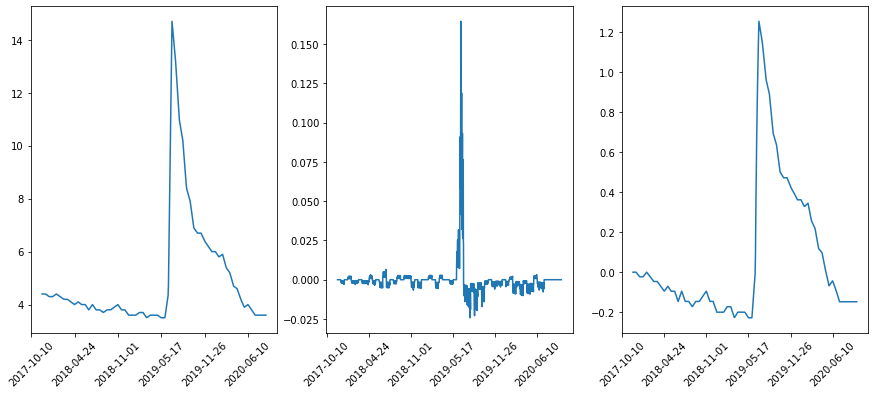

Market volatility VIXCLS


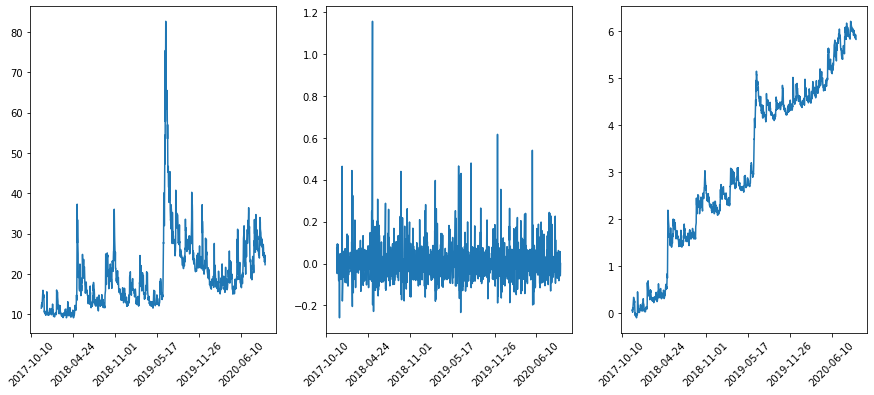

Commercial-Industrial Loans BUSLOANS


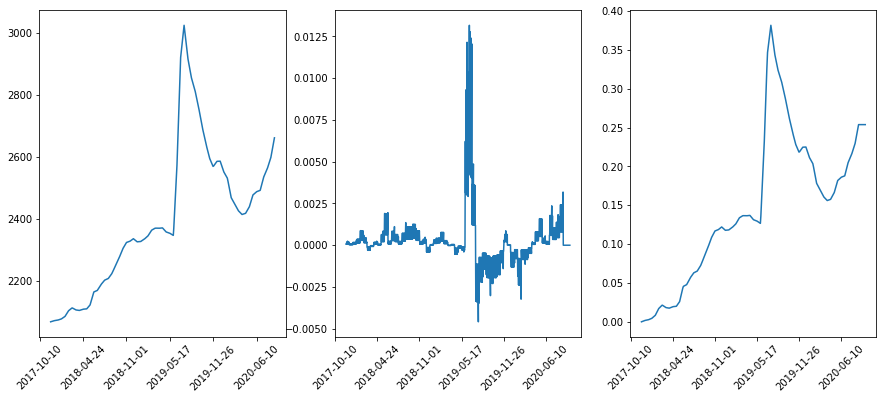

Average Weekly Hours AWHAETP


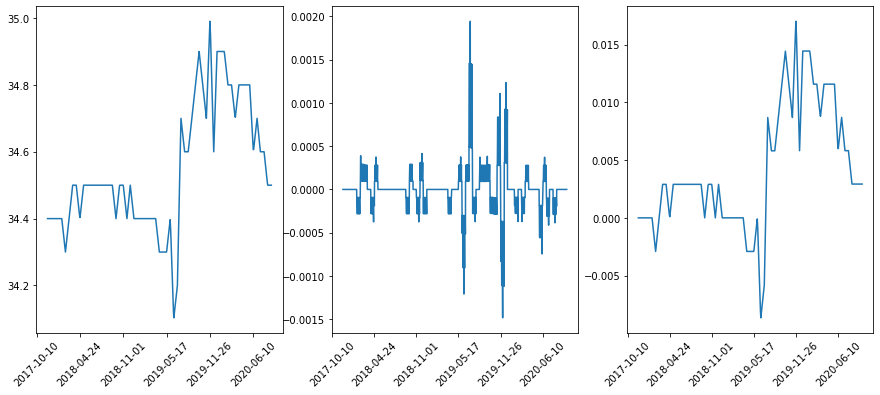

Credit to Income UMCSENT


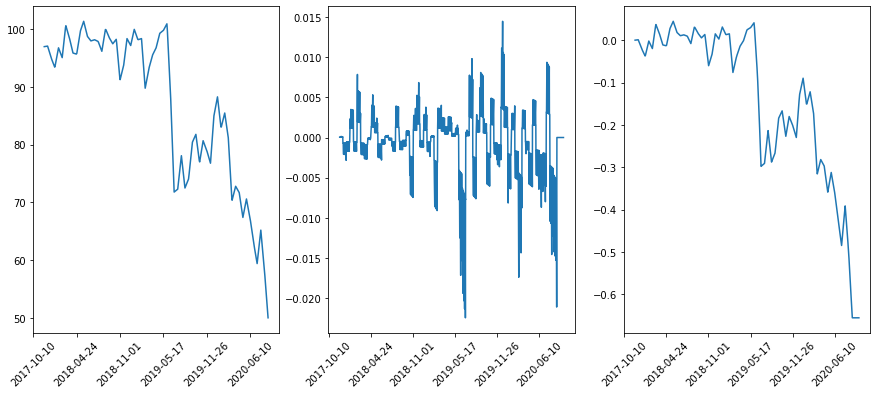

Consumer Confidence TDSP


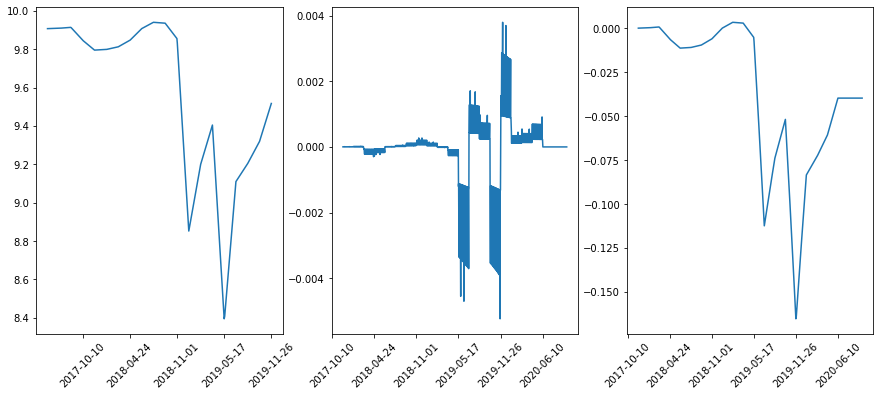

Oil Prices DCOILWTICO


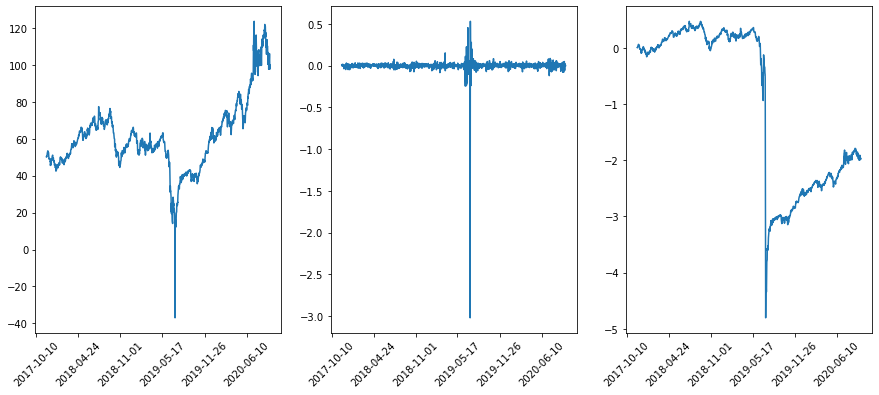

Inflation CPIAUCSL


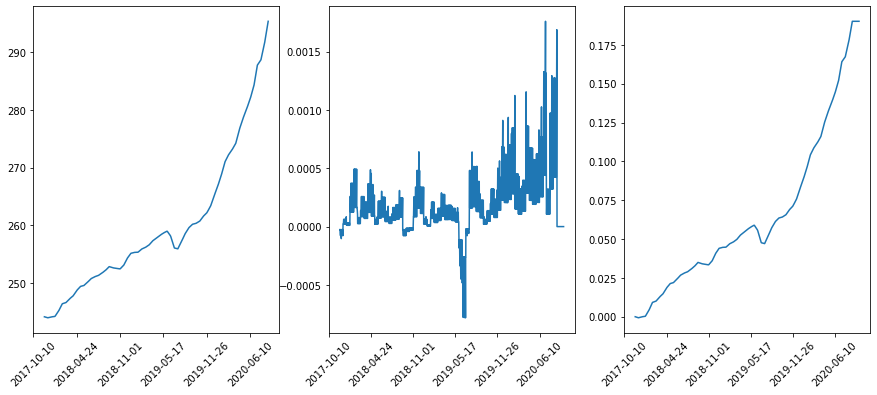

Housing Prices CSUSHPINSA


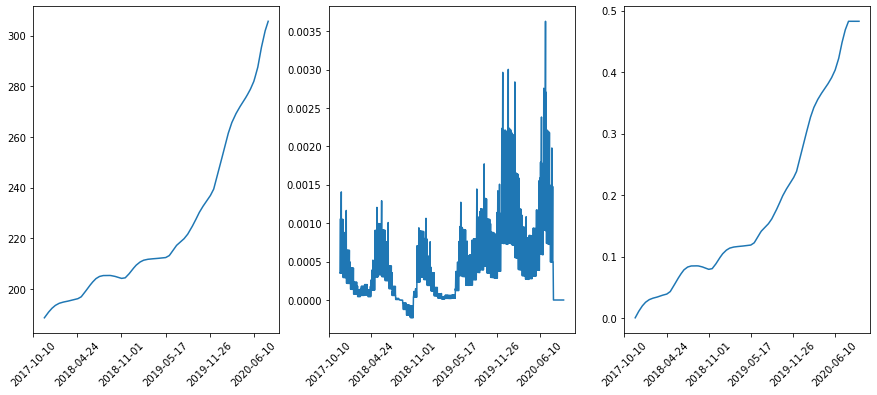

Interest Rates FEDFUNDS


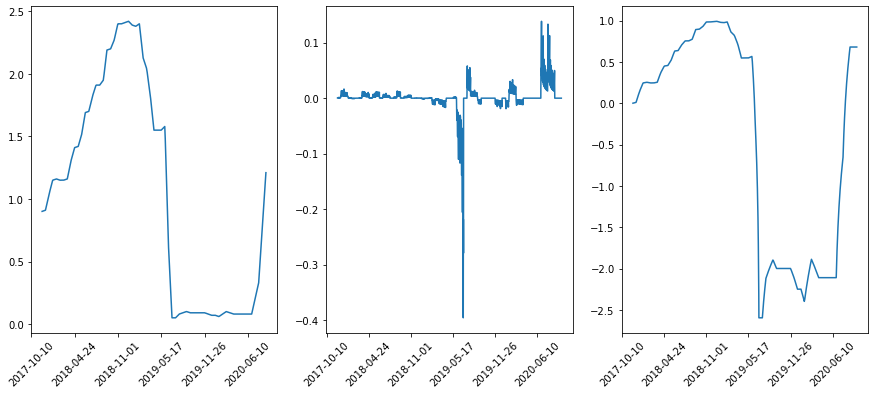

10 Year to 3 Month T10Y3M


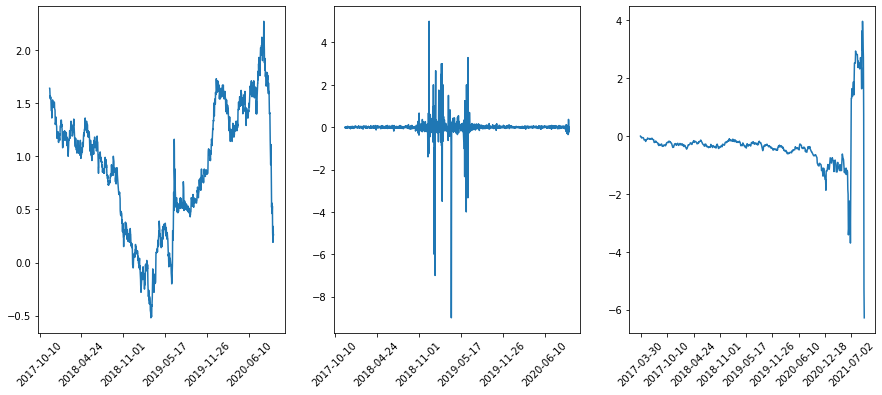

Recession Indicator USREC


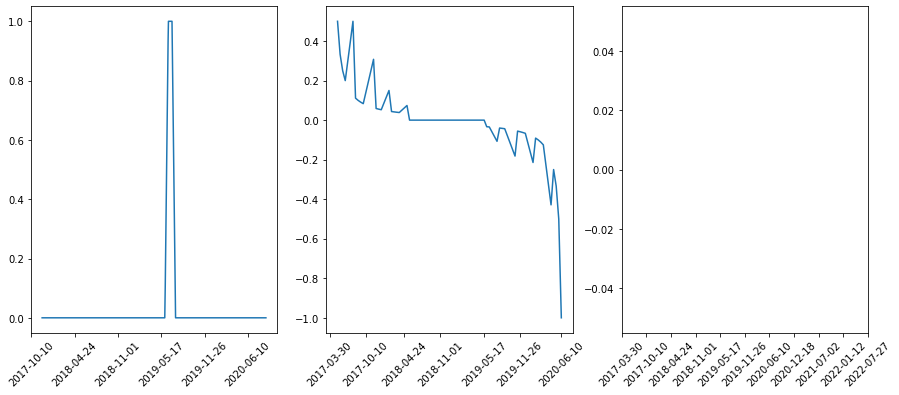

OECD Leading Indicator USALOLITONOSTSAM


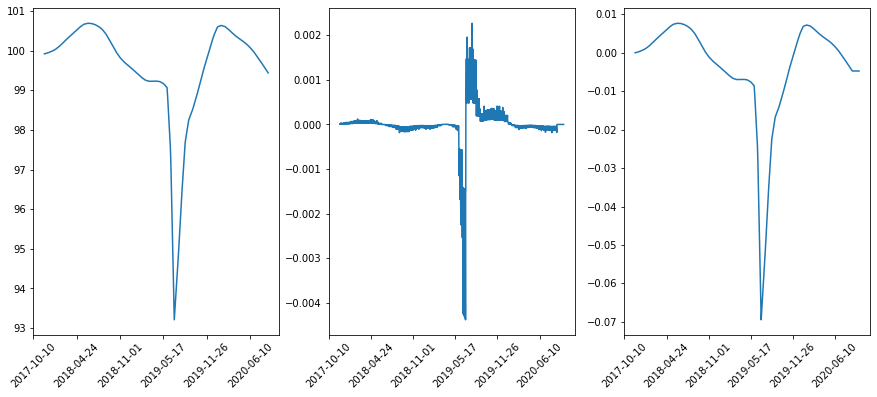

Coincident Index USPHCI


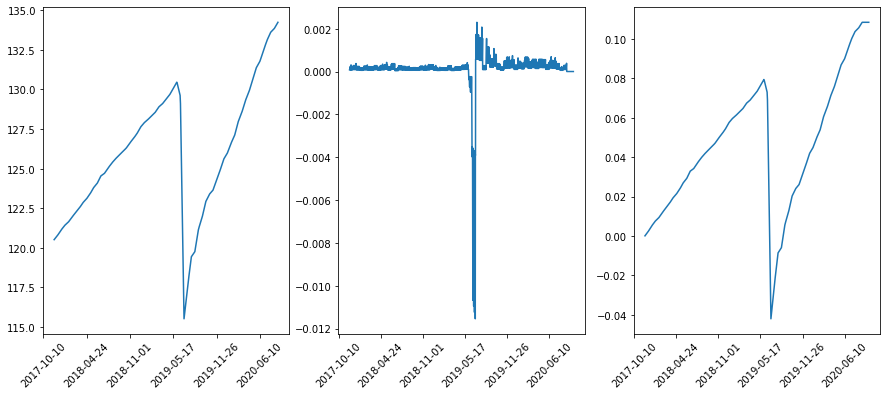

Index: Industrial Production INDPRO


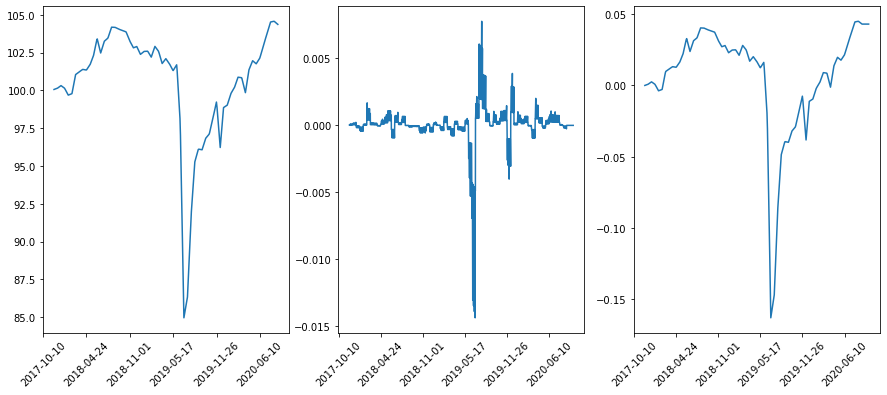

Mfr Orders Excl AC NEWORDER


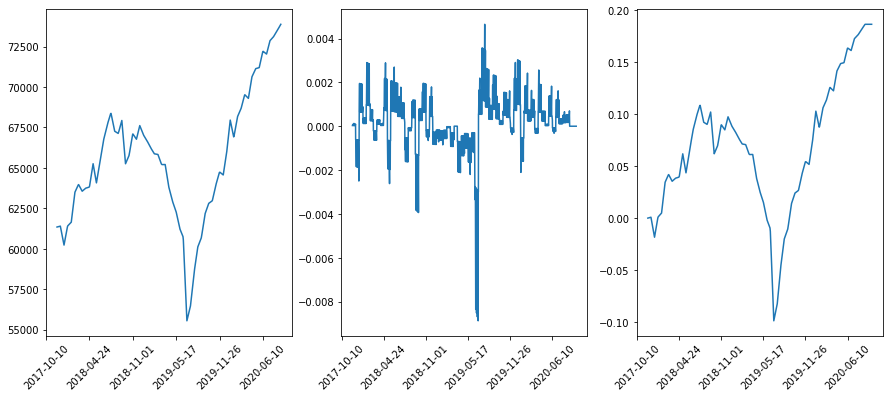

Personal Expenditures PCE


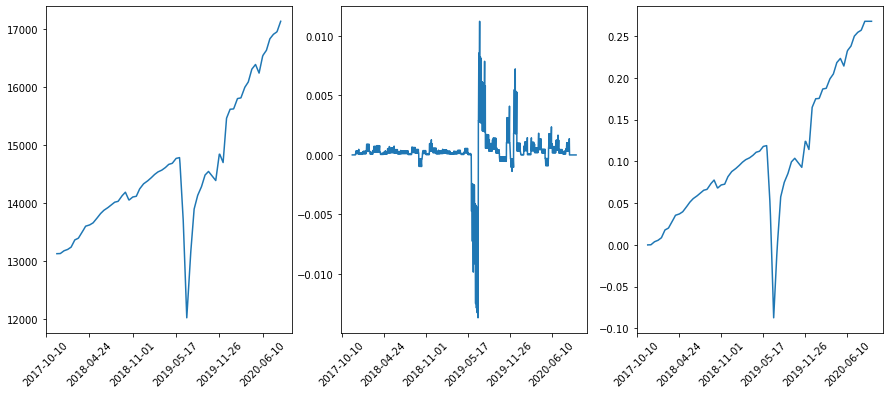

In [362]:
print('nominal,','pct_change,','pct_change().cumsum')
for pos in range(0,len(fred_names)):
    print(fred_friendly_names[pos],fred_names[pos])
    name = fred_names[pos]
    
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False,figsize=(15,6))
    ax1.plot(completed_fred_pvt_df[name])
    ax1.set_xticklabels(np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.index)/10))], rotation=45)
    ax2.plot(completed_fred_pvt_df[name].pct_change())
    ax2.set_xticklabels(np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.index)/10))], rotation=45)
    ax3.plot(completed_fred_pvt_df[name].pct_change().cumsum())
    ax3.set_xticklabels(np.array(completed_fred_pvt_df.index.map(lambda t: t.strftime('%Y-%m-%d')))[np.arange(0,len(completed_fred_pvt_df.index),int(len(completed_fred_pvt_df.index)/10))], rotation=45)
    plt.show()

In [363]:
#screener['vol_30d_2yr']

In [364]:
#pd.DataFrame(np.mean(np.exp(final_model.get_prediction(start=end,end=(end + dt.timedelta(92)).strftime('%Y-%m-%d')).summary_frame())[['mean','pi_lower']],axis=1)).iloc[0].values[0]
#[s,e_return,s_date,stop_loss_price,days_delta,discounted_return,qtr_return,test_score_mean,test_score_std,mean_revert_flag,p_metrics['pi_lower'].values[0],p_metrics['pi_upper'].values[0]]
#screener['Adj Close'].loc[decision_metrics_df.index]

In [365]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

#tscv = expanding_window(initial =52*2, horizon = 13,period = 26)

#batchClearLimit = round(len(list__)/7)

print("adf < .05 or .01, mean reverting")
print("Hurst")
print("> .5 - The time series is mean reverting.")
print("= .5 - The time series is a Geometric Brownian Motion.")
print("< .5 - The time series is trending.")
"""*indexes['Symbol'].values,*sectors['Symbol'].values,"""
"""
widgets.Dropdown(
    #options=stocks_,
    #value=None,
    description='Choose Stock:',
    disabled=False,
)

#y_=widgets.Select(options=stocks_,disabled=False)
y_=widgets.Select(options=np.sort([*list_sector_n_indexes,*list_stocks]),value=None,disabled=False)

a=interact(plot_,symbol_=y_)
"""

adf < .05 or .01, mean reverting
Hurst
> .5 - The time series is mean reverting.
= .5 - The time series is a Geometric Brownian Motion.
< .5 - The time series is trending.


"\nwidgets.Dropdown(\n    #options=stocks_,\n    #value=None,\n    description='Choose Stock:',\n    disabled=False,\n)\n\n#y_=widgets.Select(options=stocks_,disabled=False)\ny_=widgets.Select(options=np.sort([*list_sector_n_indexes,*list_stocks]),value=None,disabled=False)\n\na=interact(plot_,symbol_=y_)\n"

In [366]:
observer_set = [*[d for d in dict_sectors_reverse]][:-1]

19:36:27 - cmdstanpy - INFO - Chain [1] start processing
19:36:27 - cmdstanpy - INFO - Chain [1] done processing


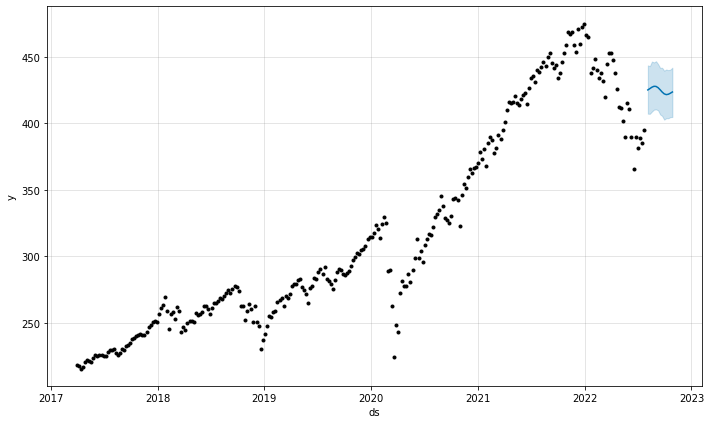

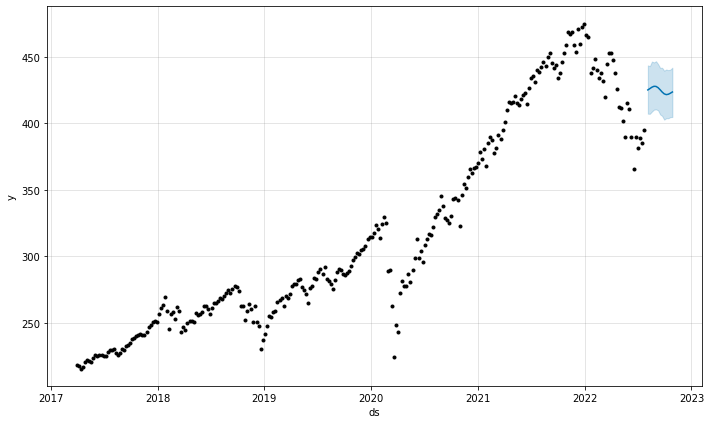

In [367]:

df = prices_df[prices_df['Symbol']=='SPY'][['Adj Close']].asfreq('D').interpolate().asfreq('W-'+end.strftime('%a')).reset_index()
df.columns = ['ds','y']

m = Prophet()
#m = MultiProphet(columns=observer_set)

for o in observer_set:
    temp = prices_df[prices_df['Symbol']==o][['Adj Close']].asfreq('D').interpolate().asfreq('W-'+end.strftime('%a')).reset_index()[['Adj Close']]
    temp.columns = [o]
    
    df = pd.concat([df,temp],axis=1)
    
#plt.plot(df['y'])

m.fit(df[['ds','y']])
future_ = m.make_future_dataframe(periods = 14,freq='W-'+nyse_dates.index[-1].strftime('%a')).tail(13)

forecast = m.predict(future_).set_index('ds')[['yhat','yhat_lower','yhat_upper']]

m.plot(forecast.reset_index())

In [368]:
"""
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
raw_seq = np.array(df['y'])
# choose a number of time steps
n_steps_in, n_steps_out = 13*4, 13
#n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(int((n_features*n_steps_in*n_steps_out)/5), activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features))))
model.add(Bidirectional(LSTM(int((n_features*n_steps_in*n_steps_out)/5), activation='relu')))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=0)
# demonstrate predictionx_input
#x_input = array([70, 80, 90])
x_input = np.array(df['y'][-n_steps_in:])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)
"""

"\nfrom numpy import array\nfrom keras.models import Sequential\nfrom keras.layers import LSTM\nfrom keras.layers import Dense\n \n# split a univariate sequence into samples\ndef split_sequence(sequence, n_steps_in, n_steps_out):\n\tX, y = list(), list()\n\tfor i in range(len(sequence)):\n\t\t# find the end of this pattern\n\t\tend_ix = i + n_steps_in\n\t\tout_end_ix = end_ix + n_steps_out\n\t\t# check if we are beyond the sequence\n\t\tif out_end_ix > len(sequence):\n\t\t\tbreak\n\t\t# gather input and output parts of the pattern\n\t\tseq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]\n\t\tX.append(seq_x)\n\t\ty.append(seq_y)\n\treturn array(X), array(y)\n \n# define input sequence\n#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]\nraw_seq = np.array(df['y'])\n# choose a number of time steps\nn_steps_in, n_steps_out = 13*4, 13\n#n_steps_in, n_steps_out = 3, 2\n# split into samples\nX, y = split_sequence(raw_seq, n_steps_in, n_steps_out)\n# reshape from [samples, timesteps] 

In [370]:
"""
df = prices_df[pr ices_df['Symbol']=='SPY'][['Adj Close']].asfreq('D').interpolate().asfreq('W-'+end.strftime('%a')).reset_index()
df.columns = ['ds','y']

m = Prophet()
#m = MultiProphet(columns=observer_set)

for o in observer_set:
    temp = prices_df[prices_df['Symbol']==o][['Adj Close']].asfreq('D').interpolate().asfreq('W-'+end.strftime('%a')).reset_index()[['Adj Close']]
    temp.columns = [o]
    
    df = pd.concat([df,temp],axis=1)

for o in observer_set:
    m.add_regressor(o)
    
    
m.fit(df)

#have to have future values, pretty much multiple regression (find stationary (cv tested?) ccf lead/lag? values)
future_ = m.make_future_dataframe(periods = 14,freq='W-'+end.strftime('%a')).tail(13)
forecast = m.predict(pd.concat([df.set_index('ds')[observer_set],future_.set_index('ds')],axis=0).reset_index().dropna()).set_index('ds')

m.plot(forecast.reset_index())
    
#plt.plot(df['y'])
"""

"\ndf = prices_df[pr ices_df['Symbol']=='SPY'][['Adj Close']].asfreq('D').interpolate().asfreq('W-'+end.strftime('%a')).reset_index()\ndf.columns = ['ds','y']\n\nm = Prophet()\n#m = MultiProphet(columns=observer_set)\n\nfor o in observer_set:\n    temp = prices_df[prices_df['Symbol']==o][['Adj Close']].asfreq('D').interpolate().asfreq('W-'+end.strftime('%a')).reset_index()[['Adj Close']]\n    temp.columns = [o]\n    \n    df = pd.concat([df,temp],axis=1)\n\nfor o in observer_set:\n    m.add_regressor(o)\n    \n    \nm.fit(df)\n\n#have to have future values, pretty much multiple regression (find stationary (cv tested?) ccf lead/lag? values)\nfuture_ = m.make_future_dataframe(periods = 14,freq='W-'+end.strftime('%a')).tail(13)\nforecast = m.predict(pd.concat([df.set_index('ds')[observer_set],future_.set_index('ds')],axis=0).reset_index().dropna()).set_index('ds')\n\nm.plot(forecast.reset_index())\n    \n#plt.plot(df['y'])\n"

In [371]:
future_commodities_n_w_index_pvt_w_Fred

,DGS3MO,DGS2,DGS10,AUDUSD=X,BRLUSD=X,BZ=F,CC=F,CL=F,CT=F,ES=F,EURUSD=X,GBPUSD=X,GC=F,GE=F,GF=F,HE=F,HG=F,HO=F,JPY=X,KC=F,KE=F,LBS=F,LE=F,MGC=F,NG=F,NQ=F,PA=F,PL=F,RB=F,SB=F,SI=F,UUP,YM=F,ZB=F,ZC=F,ZF=F,ZL=F,ZM=F,ZN=F,ZO=F,ZR=F,ZS=F,ZT=F,^GSPC,^IRX,^RUT
2011-11-30,0.01,0.25,2.08,1.001803,0.543036,NaN,2162.0,100.360001,90.309998,1246.00,1.332410,1.559795,1745.500000,99.467499,146.024994,88.175003,3.5630,3.0214,77.959999,233.800003,651.00,218.199997,121.599998,174.550003,3.550,2295.00,610.000000,1559.800049,2.5677,23.690001,32.730999,21.376776,12035.0,141.62500,601.25,123.007812,49.270000,290.399994,130.156250,343.75,1483.5,1131.25,110.195312,1246.959961,0.015,737.419983
2011-12-01,0.01,0.27,2.11,1.025483,0.553097,108.989998,2079.0,100.199997,90.699997,1243.50,1.344393,1.570722,1735.300049,99.472504,146.100006,87.574997,3.5220,2.9695,77.583000,233.199997,663.00,219.600006,121.900002,173.529999,3.648,2309.25,627.650024,1556.199951,2.5579,23.590000,32.695000,21.367085,12003.0,140.65625,594.75,122.929688,49.520000,287.200012,129.984375,322.00,1477.5,1128.00,110.179688,1244.579956,0.015,730.750000
2011-12-02,0.02,0.25,2.05,1.022296,0.555864,109.940002,2030.0,100.959999,91.349998,1243.50,1.346692,1.568308,1747.000000,99.455002,147.074997,86.250000,3.5725,2.9900,77.750000,227.149994,676.00,227.000000,121.900002,174.699997,3.584,2303.25,643.599976,1547.500000,2.6162,23.450001,32.620998,21.434919,12000.0,142.06250,586.50,123.140625,50.049999,286.399994,130.500000,318.00,1445.5,1135.75,110.195312,1244.280029,0.015,735.020020
2011-12-05,0.01,0.27,2.04,1.024003,0.557041,109.809998,2035.0,100.989998,91.510002,1255.00,1.341904,1.560988,1730.699951,99.455002,144.300003,85.300003,3.6040,2.9924,78.080002,233.949997,666.50,232.800003,118.900002,173.070007,3.461,2325.00,644.500000,1531.500000,2.6137,24.080000,32.306000,21.434919,12066.0,141.81250,580.25,123.101562,50.070000,281.100006,130.406250,300.00,1438.5,1126.25,110.179688,1257.079956,0.015,747.030029
2011-12-06,0.01,0.25,2.08,1.025662,0.561924,110.809998,2000.0,101.279999,93.309998,1255.00,1.338670,1.564309,1727.900024,99.442497,142.125000,86.150002,3.5655,3.0217,77.811996,232.850006,667.00,230.000000,118.849998,172.789993,3.487,2321.50,668.599976,1523.000000,2.6454,24.180000,32.672001,21.415537,12112.0,141.03125,585.25,123.085938,49.980000,282.200012,130.156250,300.00,1459.5,1129.50,110.195312,1258.469971,0.005,746.780029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,2.62,3.00,2.81,0.690469,0.181927,105.150002,2376.0,96.699997,97.519997,3970.00,1.020023,1.198696,1719.000000,96.974998,179.300003,117.224998,3.3510,3.5166,136.311996,210.050003,839.75,572.200012,137.750000,1719.099976,8.727,12354.50,1997.699951,864.299988,3.3820,17.469999,18.294001,28.440001,31967.0,141.40625,580.00,112.843750,60.009998,447.500000,119.656250,442.50,1693.0,1473.00,104.980469,3966.840088,2.393,1817.770020
2022-07-26,2.55,3.02,2.81,0.695120,0.186696,104.400002,2400.0,94.980003,99.690002,3923.25,1.022495,1.205516,1717.699951,96.997498,177.425003,116.974998,3.3825,3.5839,136.431000,213.199997,877.00,556.599976,136.875000,1717.699951,8.993,12112.50,2005.800049,859.099976,3.3550,17.469999,18.487000,28.660000,31732.0,142.12500,597.00,112.906250,60.419998,472.399994,119.859375,451.50,1709.5,1532.75,104.976562,3921.050049,2.475,1805.250000
2022-07-27,2.44,2.96,2.78,0.694739,0.186912,106.620003,2355.0,97.260002,99.830002,4024.50,1.012956,1.203688,1719.099976,97.047501,179.100006,118.599998,3.4295,3.7173,136.970001,219.100006,861.75,555.200012,136.800003,1719.099976,8.687,12619.00,1999.000000,871.799988,3.4288,17.400000,18.552999,28.420000,32172.0,142.75000,600.25,113.296875,61.180000,488.899994,120.421875,440.50,1708.5,1578.75,105.101562,4023.610107,2.383,1848.339966
2022-07-28,2.42,2.85,2.68,0.699490,0.190730,107.139999,2317.0,96.419998,102.370003,4073.50,1.020929,1.2163

In [372]:
len(filtered_screener_sorted)

109

In [379]:
def process_values(values):
    
    sector_list = []
    symbol_list = []
    for i in np.array(values):
        t= dict_sectors[i]
        sector_list.append(t)
        
        sublist = filtered_screener_sorted[filtered_screener_sorted['Sector Symbol']==t].index
        temp_df = filtered_screener_sorted.loc[sublist]
        #temp_df_ = temp_df['risk_trend_factor'].replace(['error','missing'], np.nan).dropna()
        
        #temp_df_filtered = temp_df_[temp_df_>0]
        
        flat_list = [item for item in temp_df.index]
        symbol_list.extend(flat_list)        
    
    button = widgets.Button(description="Process")
    output = widgets.Output()

    display(button, output)

    print("Symbols > 1 (50td_tvf_vel + risk_trend_factor)")
    print(len(sector_list),sector_list)
    print(len(symbol_list),symbol_list)
    
    def on_button_clicked(b):
        with output:            
            plot_(symbol_list)

    button.on_click(on_button_clicked)    
    
    
y_=widgets.SelectMultiple(
    options=list(dict_sectors.keys()),
    description='Choose Sectors: ',
    disabled=False)

a=interact(process_values,values=y_)
    

interactive(children=(SelectMultiple(description='Choose Sectors: ', options=('Basic Materials', 'Communicatio…

                        Sector
error                       29
Healthcare                  15
Industrials                 14
Technology                  12
Consumer Defensive          12
Consumer Cyclical            7
Financial Services           6
Utilities                    5
Real Estate                  4
Basic Materials              3
Communication Services       2


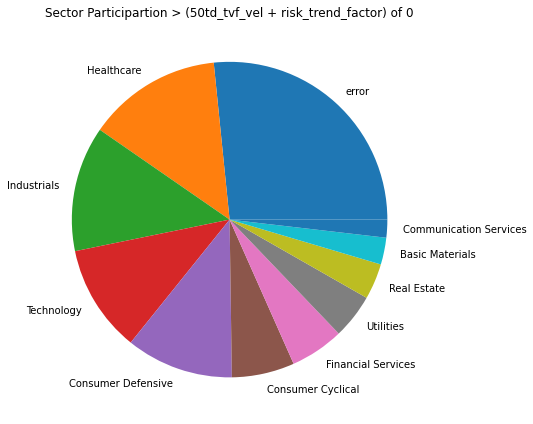

In [380]:
decision_metrics_df = pd.read_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_decision_metrics_df.csv')
decision_metrics_df.set_index(decision_metrics_df.iloc[:, 0],inplace=True)

counts_df = pd.DataFrame(decision_metrics_df['Sector'].value_counts())

print(counts_df)
fig, ax = plt.subplots()
ax.pie(counts_df['Sector'], labels=counts_df.index)
ax.set_title('Sector Participartion > (50td_tvf_vel + risk_trend_factor) of 0')
plt.tight_layout()
plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_piechart-sectors.png', dpi=300, format='png', bbox_inches='tight')

In [390]:

prices_pvt_wk = pd.pivot_table(prices_df, values=['Adj Close'], index=prices_df.index,columns=['Symbol']).asfreq('d').interpolate().asfreq('W-'+nyse_dates.index[-1].strftime('%a'))
prices_pvt_wk.columns = prices_pvt_wk.columns.droplevel(0)


In [391]:

c_df = prices_pvt_wk.corr()
c_df.sort_values(by='SPY',inplace=True,ascending=False,axis=1)
c_df.sort_values(by='SPY',inplace=True,ascending=False,axis=0)
c_df.to_csv('..\\reports\\'+end.strftime('%Y-%m-%d')+'_corr_5_yr_prices_pvt_wk.csv')

1519

In [384]:
from vevestaX import vevesta as v

try:
    V=v.Experiment(speedUp = True)
    V.start()
    V.ds=decision_metrics_df
    V.fe=decision_metrics_df
    V.end()
    V.dump(techniqueUsed='fbprophet',filename='..\\reports\\'+end.strftime('%Y-%m-%d')+'_decision_metrics_df.xlsx',message="EDA-fbprophet-nested-CV",version=1)
    os.rename('EDA.pdf','..\\reports\\'+end.strftime('%Y-%m-%d')+'_decision_metrics_df.pdf')
    #os.remove('EDA.pdf')
except:
    pass

try:
    V=v.Experiment()
    V.start()
    V.ds=fred_pvt_sample
    V.fe=fred_pvt_sample
    V.end()
    V.dump(techniqueUsed='fred_data',filename='..\\reports\\'+end.strftime('%Y-%m-%d')+'_completed_fred_pvt.xlsx',message="EDA-fred",version=2)
    os.rename('EDA.pdf','..\\reports\\'+end.strftime('%Y-%m-%d')+'_completed_fred_pvt.pdf')
    
except:
    pass

try:
    V=v.Experiment()
    V.start()
    V.ds=prices_pvt_wk[filtered_screener_sorted.index]
    V.fe=prices_pvt_wk[filtered_screener_sorted.index]
    V.end()
    V.dump(techniqueUsed='price_data',filename='..\\reports\\'+end.strftime('%Y-%m-%d')+'_completed_prices_pvt_wk.xlsx',message="EDA-prices",version=3)
    os.rename('EDA.pdf','..\\reports\\'+end.strftime('%Y-%m-%d')+'_completed_prices_pvt_wk.pdf')
except:
    pass


Dumped the experiment in the file ..\reports\2022-07-29_decision_metrics_df.xlsx
Manage notes, codes and models in one single place by using our tool at https://www.vevesta.com?utm_source=vevestaX


Symbol,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,ABBV,ABC,ABCB,ABG,ABM,ABMD,ABT,ABTX,ACA,ACC,ACHC,ACIW,ACLS,ACM,ACN,ADBE,...,WYNN,X,XEL,XHR,XNCR,XOM,XPEL,XPER,XPO,XRAY,XRX,XYL,Y,YELP,YETI,YUM,ZBH,ZBRA,ZD,ZEUS,ZIMV,ZION,ZTS,ZUMZ,ZYXI
2017-03-31,50.744480,34.325039,40.966812,NaN,34.024994,141.859009,34.053204,36.506123,55.450001,50.855625,80.966568,42.930119,60.099998,39.196484,125.199997,40.424759,36.146172,NaN,38.405457,43.599998,21.389999,18.799999,35.520981,109.813980,130.130005,...,106.727165,32.612392,38.237659,14.378197,23.920000,62.394032,NaN,29.087435,27.875437,59.856186,24.202671,47.148685,591.430725,32.750000,NaN,58.300449,113.850739,91.250000,69.632362,18.039370,NaN,36.888172,51.591003,18.299999,0.271365
2017-04-07,50.715683,33.656498,40.492260,NaN,33.014351,135.917068,33.977352,36.602116,53.849998,51.152191,80.161469,41.300465,58.000000,37.819683,125.489998,39.896816,37.020672,NaN,38.550713,43.459999,21.150000,17.950001,32.955967,107.578835,130.220001,...,108.794479,32.699203,38.194641,14.058122,22.990000,62.964626,NaN,27.973631,27.526194,59.875359,23.477249,47.721371,588.611450,33.230000,NaN,58.647156,111.771576,92.129997,67.723709,18.797495,NaN,36.466591,50.889164,16.799999,0.297626
2017-04-14,50.497332,31.002294,42.196785,NaN,32.845914,134.795242,33.480752,38.401672,54.162501,50.585140,79.285471,40.380861,57.825000,37.937024,123.640001,39.225017,35.502443,NaN,38.956235,42.682501,20.622499,18.200000,32.736392,106.506054,129.285004,...,105.937967,28.247681,38.611858,14.420313,22.445001,62.129643,NaN,27.245373,26.298021,59.388860,23.172242,46.026757,578.746475,32.194999,NaN,58.496537,111.825188,87.717501,68.016233,17.412467,NaN,34.808826,51.528421,16.887500,0.291061
2017-04-21,51.128395,31.630922,43.726986,NaN,34.843140,140.500305,33.723717,38.547821,57.250000,50.305317,74.342865,43.116386,61.349998,38.875740,125.029999,39.866085,36.291924,NaN,40.027538,43.080002,21.500000,18.600000,33.345211,110.351662,131.520004,...,107.928459,29.342474,38.564541,14.698276,23.299999,61.389744,NaN,27.459568,28.178114,59.942463,22.817778,47.552383,580.346130,33.490002,NaN,59.417786,112.992958,90.970001,70.271339,17.990770,NaN,35.878136,52.487312,18.200001,0.271365
2017-04-28,52.836834,33.656498,41.276722,NaN,35.276268,136.003235,34.050831,37.369923,58.000000,51.976383,75.065613,43.861378,61.200001,38.984047,130.320007,39.966827,37.943760,NaN,38.244049,43.580002,21.490000,19.250000,34.143658,112.267532,133.740005,...,114.549423,21.529383,38.753796,14.706697,25.670000,62.120121,NaN,28.787565,28.748545,60.623093,23.708061,48.265896,587.620422,35.410000,NaN,60.270271,111.557137,94.269997,74.885284,21.917442,NaN,35.157940,54.346996,17.950001,0.280118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,121.075546,49.360001,13.900000,16.18,53.220001,183.100006,141.660004,30.430000,63.970001,150.928238,148.460007,41.078568,177.300003,43.988338,255.320007,108.965660,38.259998,46.990002,64.470001,70.370003,27.340000,58.200001,66.889999,298.308899,387.720001,...,58.290001,19.840000,68.559998,14.870000,27.120001,86.900002,46.939999,14.830000,50.180000,36.759998,15.790000,79.610001,833.500000,30.330000,48.459999,114.419998,108.870003,308.910004,76.580002,26.700001,16.180000,53.330002,174.290146,28.530001,7.930000
2022-07-01,119.209999,44.779999,13.130000,14.75,55.770000,173.639999,138.929993,30.180000,61.419998,152.374710,143.139999,40.840000,173.279999,43.002857,254.559998,109.732262,38.900002,46.310001,64.739998,71.580002,25.870001,47.950001,65.589996,279.655273,368.480011,...,58.180000,17.910000,72.629997,14.600000,28.860001,87.550003,45.310001,14.330000,48.150002,36.200001,14.120000,78.750000,833.900024,27.860001,44.590000,116.709999,107.269997,299.339996,75.349998,26.030001,15.880000,51.380001,173.890884,25.309999,8.070000
2022-07-08,122.510002,44.830002,13.970000,15.33,54.720001,18

Symbol,SPY,EHAB,SPTM,ACN,VGT,AME,VHT,DOV,APH,FELE,NDAQ,GOOG,GOOGL,VCR,LIN,ADI,LOW,POOL,TXN,MTD,ODFL,IQV,DHR,TECH,MSFT,...,HA,UVE,HTLD,BFH,NOV,UFCS,ARR,CLB,AAL,NCLH,PRA,CNK,PRGO,HCSG,MAC,OIS,SVC,DRQ,ATNI,CCL,VTRS,CXW,DHC,IVR,GEO
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SPY,1.000000,1.0,0.999730,0.990159,0.989390,0.987780,0.987120,0.986686,0.985767,0.985355,0.984651,0.984326,0.983348,0.982845,0.982819,0.982715,0.982145,0.981293,0.981139,0.980186,0.980021,0.979509,0.979421,0.979228,0.979178,...,-0.634659,-0.639333,-0.657920,-0.670068,-0.672758,-0.678667,-0.681493,-0.689378,-0.690476,-0.691512,-0.691674,-0.692061,-0.694872,-0.696945,-0.699847,-0.718035,-0.726977,-0.730548,-0.732538,-0.751981,-0.772887,-0.781755,-0.801692,-0.811736,-0.887379
EHAB,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000
SPTM,0.999730,1.0,1.000000,0.988664,0.986940,0.987643,0.985157,0.986149,0.986547,0.986267,0.982987,0.984532,0.983541,0.983354,0.980440,0.982928,0.980626,0.978766,0.981218,0.979281,0.977654,0.979343,0.976008,0.979024,0.975033,...,-0.620658,-0.631707,-0.657916,-0.656469,-0.660177,-0.667456,-0.668495,-0.676709,-0.678143,-0.679063,-0.679914,-0.679190,-0.689432,-0.687113,-0.687285,-0.705878,-0.714709,-0.720370,-0.732526,-0.739726,-0.763930,-0.773048,-0.791421,-0.802892,-0.880881
ACN,0.990159,1.0,0.988664,1.000000,0.982129,0.971976,0.975651,0.981055,0.981633,0.970370,0.986694,0.978885,0.979160,0.965442,0.983088,0.972058,0.982315,0.981061,0.962635,0.975875,0.983807,0.977135,0.979686,0.970566,0.982796,...,-0.664585,-0.631572,-0.674006,-0.685756,-0.684875,-0.687937,-0.703480,-0.705893,-0.705099,-0.707771,-0.697011,-0.701756,-0.703051,-0.731914,-0.702955,-0.727370,-0.741724,-0.756507,-0.731432,-0.765163,-0.782719,-0.773955,-0.812975,-0.813156,-0.879206
VGT,0.989390,1.0,0.986940,0.982129,1.000000,0.980226,0.988433,0.972581,0.970024,0.975693,0.981987,0.968952,0.967676,0.984554,0.979574,0.977706,0.978990,0.988132,0.980939,0.976582,0.981042,0.963368,0.988668,0.977728,0.990457,...,-0.701059,-0.684082,-0.636763,-0.738337,-0.744491,-0.746412,-0.747836,-0.749172,-0.760356,-0.763889,-0.771365,-0.765581,-0.722062,-0.728601,-0.770178,-0.780690,-0.792734,-0.786507,-0.729457,-0.819100,-0.810953,-0.842262,-0.848198,-0.866706,-0.912754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VTRS,-0.772887,-1.0,-0.763930,-0.782719,-0.810953,-0.794678,-0.806221,-0.777105,-0.721523,-0.742581,-0.782226,-0.722312,-0.718867,-0.735431,-0.834123,-0.801821,-0.760509,-0.792309,-0.779861,-0.757099,-0.774272,-0.799429,-0.827296,-0.779618,-0.847153,...,0.868527,0.677893,0.537279,0.935346,0.911508,0.631682,0.830656,0.954898,0.921381,0.779525,0.840881,0.732265,0.891286,0.889116,0.933923,0.932803,0.785174,0.755854,0.575341,0.893911,1.000000,0.809678,0.951053,0.784807,0.863078
CXW,-0.781755,1.0,-0.773048,-0.773955,-0.842262,-0.810145,-0.820650,-0.761030,-0.747310,-0.771201,-0.780464,-0.733123,-0.729090,-0.799039,-0.809345,-0.793173,-0.778941,-0.811051,-0.832244,-0.773227,-0.804838,-0.741750,-0.830066,-0.784255,-0.836739,...,0.845509,0.697939,0.431178,0.857800,0.852731,0.752563,0.825675,0.832341,0.836322,0.832685,0.881361,0.849728,0.682026,0.719932,0.887574,0.873056,0.857690,0.802072,0.641153,0.875861,0.809678,1.000000,0.891449,0.868999,0.936863
DHC,-0.801692,1.0,-0.791421,-0.812975,-0.848198,-0.823007,-0.839652,-0.797698,-0.755242,-0.770117,-0.811352,-0.754348,-0.750652,-0.770353,-0.860597,-0.827747,-0.796626,-

In [ ]:
from autots import AutoTS, load_daily

# sample datasets can be used in either of the long or wide import shapes
long = False
#df = load_daily(long=long)
df = prices_pvt_wk['HSY']

model = AutoTS(
    forecast_length=13,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=False,
    model_list="fast_parallel",  # "superfast", "default", "fast_parallel"
    transformer_list="superfast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)
model = model.fit(
    df,
    date_col='datetime' if long else None,
    value_col='value' if long else None,
    id_col='series_id' if long else None,
)

prediction = model.predict()
# plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2019-01-01")
# Print the details of the best model
print(model)

# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")